## Heart Disease Indicators Capstone Project

The dataset originally comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. As described by the CDC: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states, the District of Columbia, and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.
- Source  :https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data .

- Can you indicate which variables have a significant effect on the likelihood of heart disease?

### 1. Loading Libraries & Dataset

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopandas.tools import geocode
import plotly.express as px
import geopandas as gpd


# Encoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

#Machine Learning
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [29]:
df = pd.read_csv("Data\heart_2022_with_nans.csv")

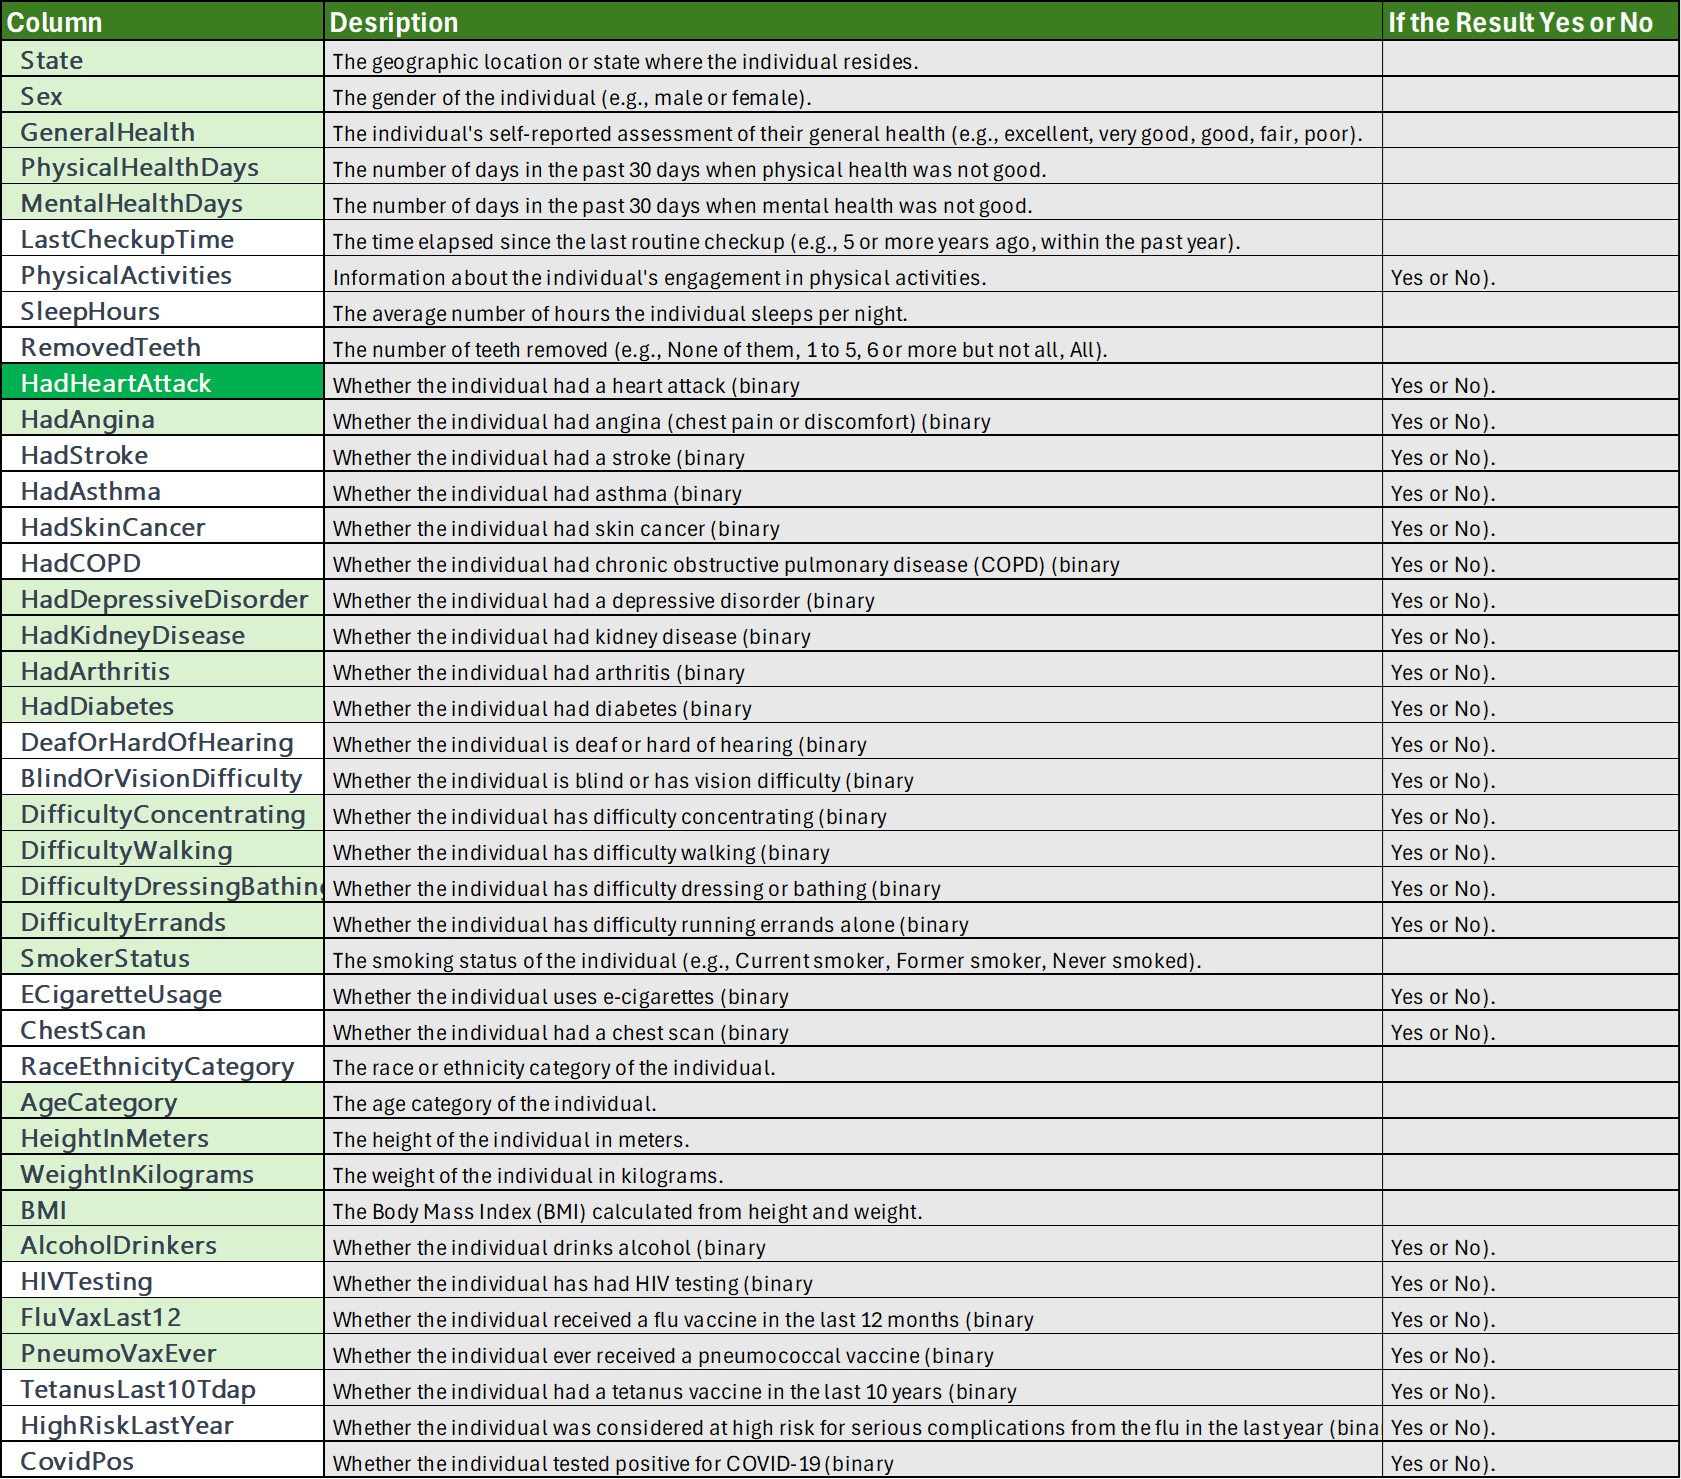

## 2. Data Investigation & Preprocessing

**Explore Data**

In [30]:
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [31]:
df.shape

(445132, 40)

In [32]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [33]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

**Check Null Values**

In [35]:
# Null Count
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

**Remove Missing Values**

In [36]:
# Remove rows with missing values
df = df.dropna()

# Remove columns with missing values
df = df.dropna(axis=1)

In [37]:
# Null Count
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

**Duplicated Values**

In [38]:
df.duplicated().sum()

9

In [39]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [40]:
df.shape

(246013, 40)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  HadAngina                  246013 non-null  object 
 11  HadStroke                  246013 non-null  object 
 12  HadAsthma                  246013 non-null  object 
 13  HadSkinCancer              24601

**Outliers**

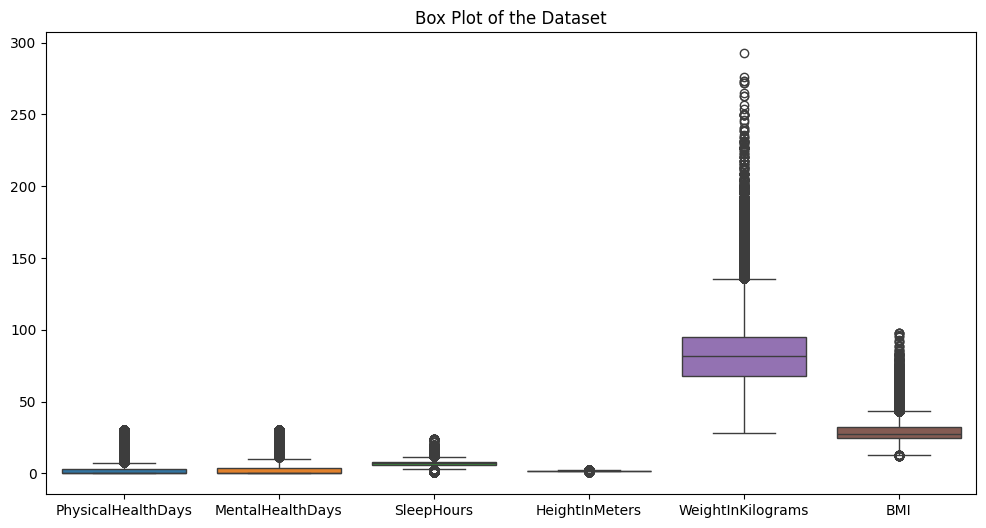

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot of the Dataset')
plt.show()

**Converting of Categorical Variables to Numerics for correlations**

Label encoding will be used for just correlations. I recognize that , encoding is done randomly not by ascending or descending. But we have 34 objects and firstly ı will analyze correlation according to the **HadHeartAttack** feature. Then ı will analyze detailly.           

In [43]:
# Select only categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns

# Display the names of categorical variables
print("Categorical Variables:")
print(categorical_variables)

Categorical Variables:
Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [44]:
# Create a new DataFrame containing only the categorical variables
df_categorical = df[categorical_variables]

In [45]:
# Display the first few rows of the DataFrame containing categorical variables
df_categorical.head(3)

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 65 to 69,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,Within past year (anytime less than 12 months ...,Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 70 to 74,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,Within past year (anytime less than 12 months ...,No,"6 or more, but not all",No,No,No,No,...,Yes,"White only, Non-Hispanic",Age 75 to 79,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [46]:
# Display unique values for each categorical variable
for variable in df_categorical:
    unique_values = df[variable].unique()
    print(f"Unique values for {variable}:\n{unique_values}\n")

Unique values for State:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Unique values for Sex:
['Female' 'Male']

Unique values for GeneralHealth:
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Unique values for LastCheckupTime:
['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but le

In [47]:

# Apply LabelEncoder to only object columns
label_encoder = LabelEncoder()
df_encoded = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)

In [48]:
df_encoded.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,0,0,4,4.0,0.0,3,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
343,0,1,4,0.0,0.0,3,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
345,0,1,4,0.0,0.0,3,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
346,0,0,1,5.0,0.0,3,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
347,0,0,2,3.0,15.0,3,1,5.0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


In [49]:
df_encoded.shape

(246013, 40)

In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  int32  
 1   Sex                        246013 non-null  int32  
 2   GeneralHealth              246013 non-null  int32  
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  int32  
 6   PhysicalActivities         246013 non-null  int32  
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  int32  
 9   HadHeartAttack             246013 non-null  int32  
 10  HadAngina                  246013 non-null  int32  
 11  HadStroke                  246013 non-null  int32  
 12  HadAsthma                  246013 non-null  int32  
 13  HadSkinCancer              24601

In [51]:
for i in df_encoded:
    print(df_encoded[i].value_counts())
    print("\n")

State
50    14998
21     9163
24     9161
36     8995
33     8923
45     7408
9      7315
17     6145
52     6126
20     6013
16     5672
12     5596
49     5565
15     5502
42     5471
22     5465
2      5461
46     5373
23     5370
5      5159
28     5107
4      5096
6      5053
10     4978
47     4844
43     4404
27     4264
26     4195
31     3966
30     3756
40     3589
13     3468
1      3205
41     3111
38     3049
19     3010
51     2974
32     2968
37     2941
3      2940
39     2729
44     2725
14     2607
34     2551
35     2498
25     2438
18     2413
53     2410
7      2155
0      1902
29     1769
8      1725
11     1549
48      743
Name: count, dtype: int64


Sex
0    127806
1    118207
Name: count, dtype: int64


GeneralHealth
4    86996
2    77407
0    41522
1    30658
3     9430
Name: count, dtype: int64


PhysicalHealthDays
0.0     152794
30.0     17159
2.0      14728
1.0      10058
3.0       9137
5.0       8939
10.0      6068
7.0       5221
4.0       4906
15.0      4

## 3. Exploratory Data Analysis (EDA):

**Correlation**

In previous lecture, I create encoded labels **(df_encoded)** to evaluate and find the mine major features. So firstly I will look correlations and than we will go feature engineering step.
- I choose 0.3 for correlation result and filtreted for mine main columns in the feature engineering.
- I will take columns that at least one time correlate different column.

In [52]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()
# Define the condition for the mask (e.g., correlations above 0.3)
condition = (correlation_matrix.abs() > 0.3) & (correlation_matrix.abs() < 1.0)

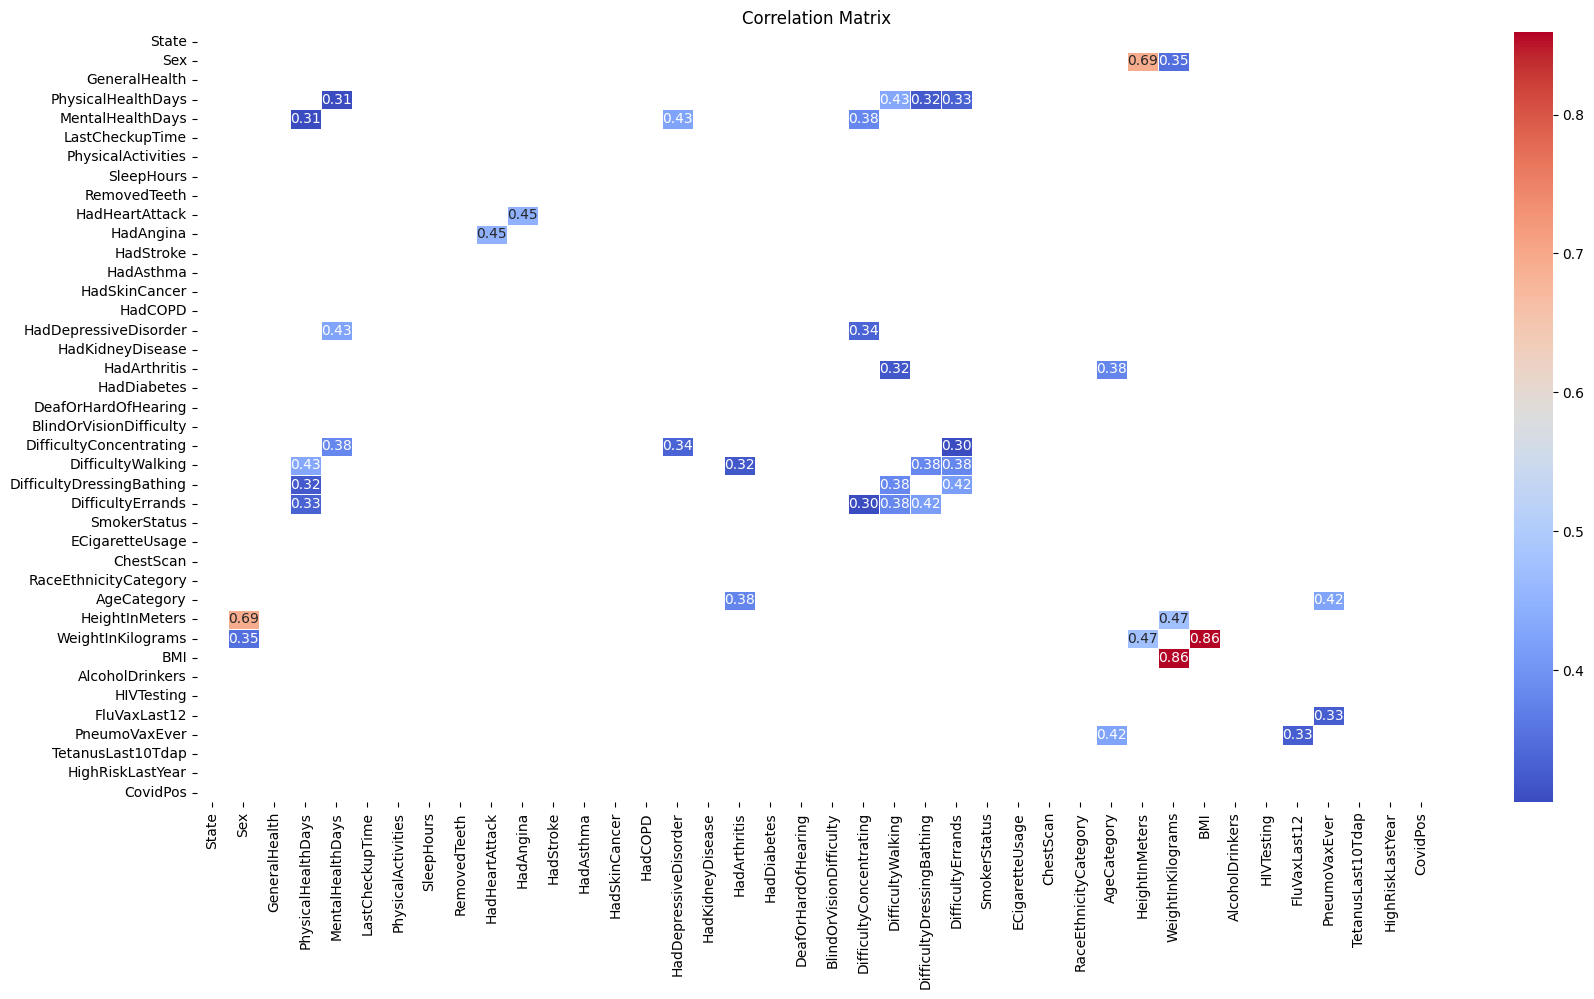

In [53]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5,mask=~condition)
plt.title("Correlation Matrix")
plt.show()

**My new columns for future engineering**

    State
    Sex
    GeneralHealth
    PhysicalHealthDays
    MentalHealthDays
    HadHeartAttack
    HadAngina
    HadDepressiveDisorder
    HadKidneyDisease
    HadArthritis
    HadDiabetes
    DifficultyConcentrating
    DifficultyWalking
    DifficultyDressingBathing
    DifficultyErrands
    SmokerStatus
    AgeCategory
    HeightInMeters
    WeightInKilograms
    BMI
    AlcoholDrinkers
    FluVaxLast12
    PneumoVaxEver




In [54]:
# 'target' sütunu ile diğer sütünlar arasındaki korelasyonları hesapla
correlations_with_target = df_encoded.corr()['HadHeartAttack'].sort_values(ascending=False)

# Korelasyonları yazdır
print("Korelasyonlar 'HadHeartAttack' ile:")
print(correlations_with_target)

Korelasyonlar 'HadHeartAttack' ile:
HadHeartAttack               1.000000
HadAngina                    0.445902
HadStroke                    0.177149
AgeCategory                  0.172181
ChestScan                    0.167766
DifficultyWalking            0.159884
HadDiabetes                  0.135104
PhysicalHealthDays           0.133422
HadCOPD                      0.133220
PneumoVaxEver                0.119965
HadArthritis                 0.117772
HadKidneyDisease             0.109353
DeafOrHardOfHearing          0.097660
DifficultyErrands            0.089492
DifficultyDressingBathing    0.083089
Sex                          0.073317
BlindOrVisionDifficulty      0.072962
LastCheckupTime              0.065852
DifficultyConcentrating      0.051661
HadSkinCancer                0.049415
FluVaxLast12                 0.045242
WeightInKilograms            0.038432
BMI                          0.030409
MentalHealthDays             0.025888
RaceEthnicityCategory        0.024206
HadAsthma     

After this step, I will continue with my df to visualize.

**Visualization**

Kitlemizi tanıyalım

<function matplotlib.pyplot.show(close=None, block=None)>

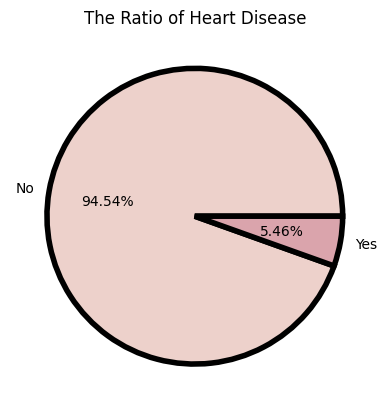

In [55]:
#show Ratio of HeartDisease from data

plt.pie(x = df['HadHeartAttack'].value_counts() ,autopct='%1.2f%%' ,labels=df['HadHeartAttack'].value_counts().index,colors=sns.cubehelix_palette(),wedgeprops = {"linewidth": 4, "edgecolor": "black"})
plt.title('The Ratio of Heart Disease')
plt.show

State Mapping

In [56]:
df["State"].value_counts()

State
Washington              14998
Maryland                 9163
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5461
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4844
South Dakota             4404
Montana                  4264
Missouri                 4195
New Jersey               3966
New Hampshire            3756
Puerto Rico              3589
Idaho                    3468
Alaska                   3205
Rhod

In [57]:
"""
import plotly.express as px

# Assuming df is your DataFrame with 'State' and 'HadHeartAttack' columns

# Create a mapping of full state names to state abbreviations
state_mapping = {
    "Washington": "WA",
    "Maryland": "MD",
    "Minnesota": "MN",
    "Ohio": "OH",
    "New York": "NY",
    "Texas": "TX",
    "Florida": "FL",
    "Kansas": "KS",
    "Wisconsin": "WI",
    "Maine": "ME",
    "Iowa": "IA",
    "Hawaii": "HI",
    "Virginia": "VA",
    "Indiana": "IN",
    "South Carolina": "SC",
    "Massachusetts": "MA",
    "Arizona": "AZ",
    "Utah": "UT",
    "Michigan": "MI",
    "Colorado": "CO",
    "Nebraska": "NE",
    "California": "CA",
    "Connecticut": "CT",
    "Georgia": "GA",
    "Vermont": "VT",
    "South Dakota": "SD",
    "Montana": "MT",
    "Missouri": "MO",
    "New Jersey": "NJ",
    "New Hampshire": "NH",
    "Puerto Rico": "PR",
    "Idaho": "ID",
    "Alaska": "AK",
    "Rhode Island": "RI",
    "Oregon": "OR",
    "Louisiana": "LA",
    "West Virginia": "WV",
    "New Mexico": "NM",
    "Oklahoma": "OK",
    "Arkansas": "AR",
    "Pennsylvania": "PA",
    "Tennessee": "TN",
    "Illinois": "IL",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Mississippi": "MS",
    "Kentucky": "KY",
    "Wyoming": "WY",
    "Delaware": "DE",
    "Alabama": "AL",
    "Nevada": "NV",
    "District of Columbia": "DC",
    "Guam": "GU",
    "Virgin Islands": "VI",
}

# Map the full state names to state abbreviations
df['StateAbbreviation'] = df['State'].map(state_mapping)

# Create a map
fig = px.choropleth(df,
                    locations='StateAbbreviation',
                    locationmode='USA-states',
                    color='HadHeartAttack',
                    hover_name='State',
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='Heart Disease Counts According to the States by Country')
fig.update_coloraxes(colorbar_title='Total HadHeartAttack Counts')  # Set color bar title
fig.show()
"""

'\nimport plotly.express as px\n\n# Assuming df is your DataFrame with \'State\' and \'HadHeartAttack\' columns\n\n# Create a mapping of full state names to state abbreviations\nstate_mapping = {\n    "Washington": "WA",\n    "Maryland": "MD",\n    "Minnesota": "MN",\n    "Ohio": "OH",\n    "New York": "NY",\n    "Texas": "TX",\n    "Florida": "FL",\n    "Kansas": "KS",\n    "Wisconsin": "WI",\n    "Maine": "ME",\n    "Iowa": "IA",\n    "Hawaii": "HI",\n    "Virginia": "VA",\n    "Indiana": "IN",\n    "South Carolina": "SC",\n    "Massachusetts": "MA",\n    "Arizona": "AZ",\n    "Utah": "UT",\n    "Michigan": "MI",\n    "Colorado": "CO",\n    "Nebraska": "NE",\n    "California": "CA",\n    "Connecticut": "CT",\n    "Georgia": "GA",\n    "Vermont": "VT",\n    "South Dakota": "SD",\n    "Montana": "MT",\n    "Missouri": "MO",\n    "New Jersey": "NJ",\n    "New Hampshire": "NH",\n    "Puerto Rico": "PR",\n    "Idaho": "ID",\n    "Alaska": "AK",\n    "Rhode Island": "RI",\n    "Oregon": "O

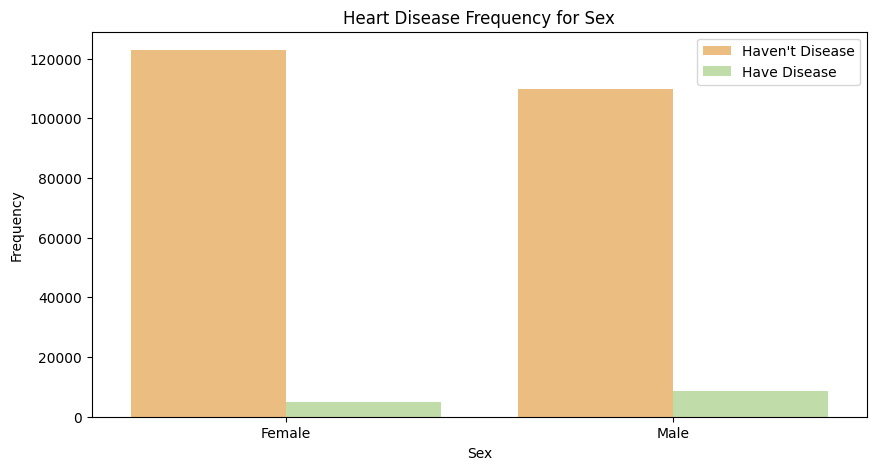

In [58]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = df['Sex'], data=df, hue='HadHeartAttack',palette="Spectral")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [59]:
#AgeCategory frequency
df['AgeCategory'].value_counts()

AgeCategory
Age 65 to 69       28555
Age 60 to 64       26719
Age 70 to 74       25737
Age 55 to 59       22224
Age 50 to 54       19912
Age 75 to 79       18133
Age 80 or older    17816
Age 40 to 44       16973
Age 45 to 49       16753
Age 35 to 39       15614
Age 30 to 34       13346
Age 18 to 24       13122
Age 25 to 29       11109
Name: count, dtype: int64

In [60]:
df.groupby(['AgeCategory','HadHeartAttack'])['HadHeartAttack'].count()

AgeCategory      HadHeartAttack
Age 18 to 24     No                13072
                 Yes                  50
Age 25 to 29     No                11062
                 Yes                  47
Age 30 to 34     No                13256
                 Yes                  90
Age 35 to 39     No                15458
                 Yes                 156
Age 40 to 44     No                16745
                 Yes                 228
Age 45 to 49     No                16333
                 Yes                 420
Age 50 to 54     No                19209
                 Yes                 703
Age 55 to 59     No                21112
                 Yes                1112
Age 60 to 64     No                25144
                 Yes                1575
Age 65 to 69     No                26400
                 Yes                2155
Age 70 to 74     No                23329
                 Yes                2408
Age 75 to 79     No                16068
                 Yes     

**Heart Disease According to the Age**

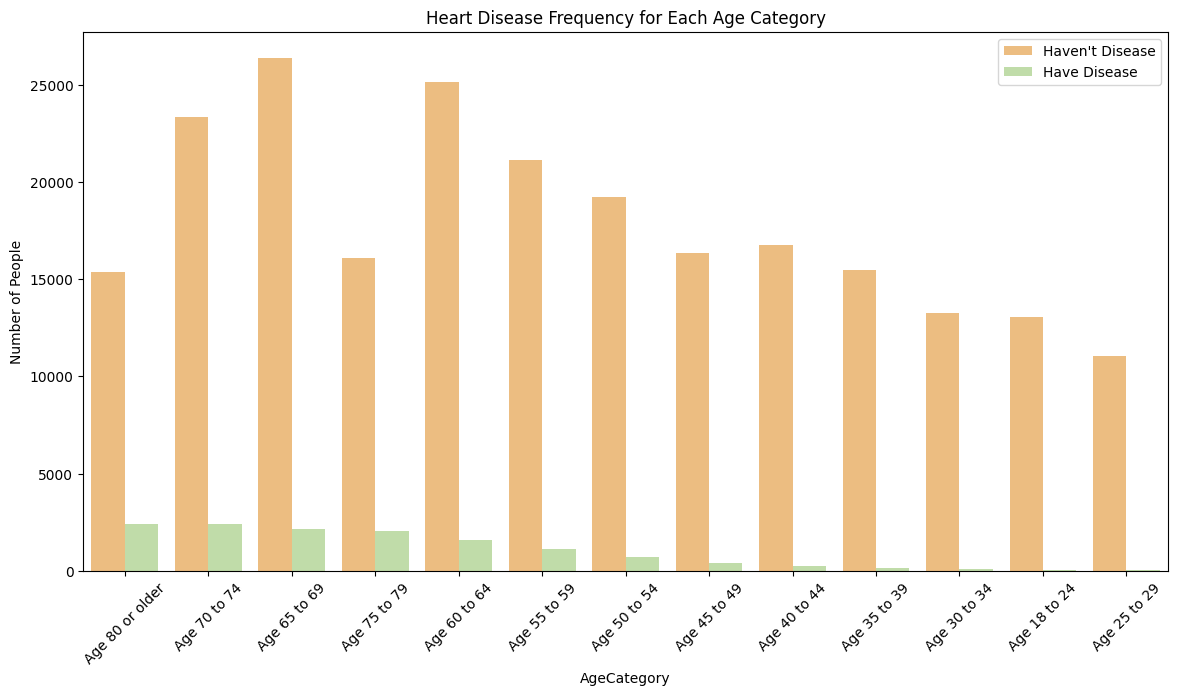

In [61]:
#show Heart Disease Frequency for AgeCategory

# Calculate the order based on the frequency of 'Yes' in 'HadHeartAttack'
order_by_frequency = df[df['HadHeartAttack'] == 'Yes']['AgeCategory'].value_counts().index
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=df, hue='HadHeartAttack', order=order_by_frequency
              ,palette="Spectral")
plt.title('Heart Disease Frequency for Each Age Category')
plt.xlabel('AgeCategory')
plt.xticks(rotation=45)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Number of People')
plt.show()

**General Health by Heart Disease**

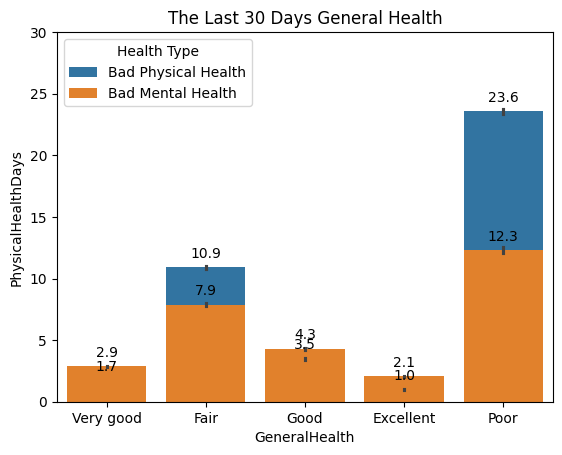

In [62]:
# Use seaborn barplot with hue
ax = sns.barplot(x="GeneralHealth", y="PhysicalHealthDays", data=df, label="Bad Physical Health")
ax = sns.barplot(x="GeneralHealth", y="MentalHealthDays", data=df, label="Bad Mental Health")

# Add number labels on top of each bar
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.1f}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust legend position
ax.legend(title='Health Type', loc='upper left')

# Set y-axis label value range
ax.set_ylim(0, 30)
# Set plot title
plt.title("The Last 30 Days General Health")

# Show the plot
plt.show()

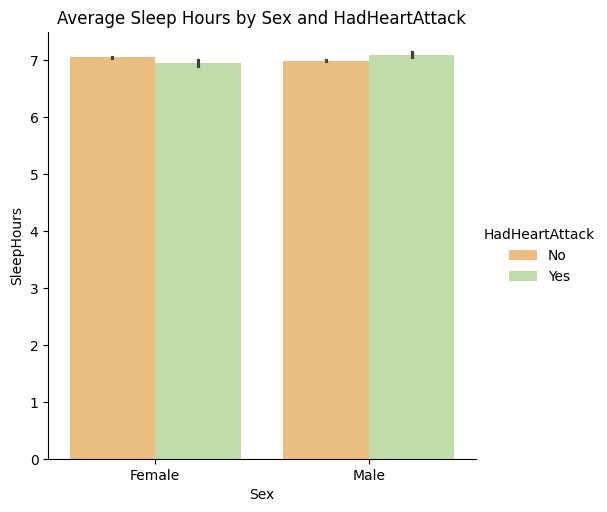

In [63]:
# Use seaborn catplot with bar kind

ax=sns.catplot(x='Sex', y='SleepHours', hue='HadHeartAttack', kind='bar', data=df, estimator='mean',palette="Spectral")
# Set plot title
plt.title("Average Sleep Hours by Sex and HadHeartAttack")

# Show the plot
plt.show()

**For HeartDisease==Yes**

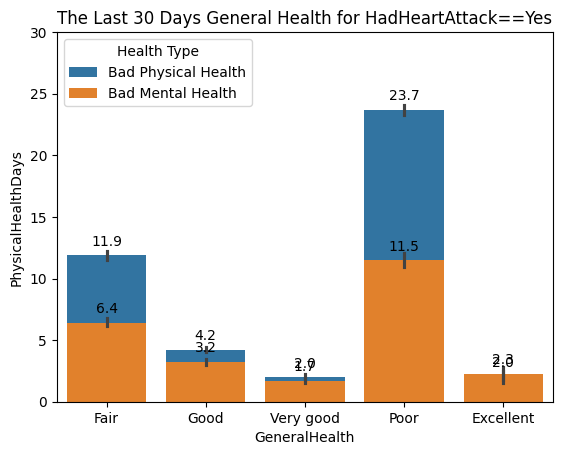

In [64]:
# Filter DataFrame for rows where HadHeartAttack is Yes
df_filtered = df[df['HadHeartAttack'] == 'Yes']

# Use seaborn barplot with hue
ax = sns.barplot(x="GeneralHealth", y="PhysicalHealthDays", data=df_filtered, label="Bad Physical Health")
ax = sns.barplot(x="GeneralHealth", y="MentalHealthDays", data=df_filtered, label="Bad Mental Health")

# Add number labels on top of each bar
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.1f}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Adjust legend position
ax.legend(title='Health Type', loc='upper left')

# Set y-axis label value range
ax.set_ylim(0, 30)  

# Set plot title
plt.title("The Last 30 Days General Health for HadHeartAttack==Yes")

# Show the plot
plt.show()

##### State 

##### Smoke Status

In correlation map ;
- DifficultyConcentrating    
- DifficultyWalking          
- DifficultyDressingBathing 
have directly have relation each others. 

When we look HeartDisease ;
- I grouped ;  Sex- Age-SmokerStatus

I see that ;
- Smoker status is same by female and male.
- **Geniş çaplı olarak baktığımda smoker-not smoker tablosunda heart_disease==yes olanlarda 70-74 yaş smoker>not smoker fakat all tabloya baktığımda yine aynı örneklem için heart_disease==Yes& No 70-74 yaş da smoker< Not smoker bu yüzden bunlar ve diğer tablolar ayrıntılı olarak analiz edilebilir.**

In [65]:
#the count of people Smoking
df['SmokerStatus'].value_counts()

SmokerStatus
Never smoked                             147731
Former smoker                             68524
Current smoker - now smokes every day     21659
Current smoker - now smokes some days      8099
Name: count, dtype: int64

In [66]:
df.groupby(['Sex','AgeCategory','SmokerStatus','HadHeartAttack'])['HadHeartAttack'].count()

Sex     AgeCategory      SmokerStatus                           HadHeartAttack
Female  Age 18 to 24     Current smoker - now smokes every day  No                 138
                                                                Yes                  1
                         Current smoker - now smokes some days  No                 121
                         Former smoker                          No                 304
                         Never smoked                           No                5029
                                                                                  ... 
Male    Age 80 or older  Current smoker - now smokes some days  Yes                 12
                         Former smoker                          No                3061
                                                                Yes                818
                         Never smoked                           No                2801
                                                   

- Current Smoker: A person who is currently actively smoking 
- Former Smoker: A person who used to smoke but has quit smoking at the time of data collection.

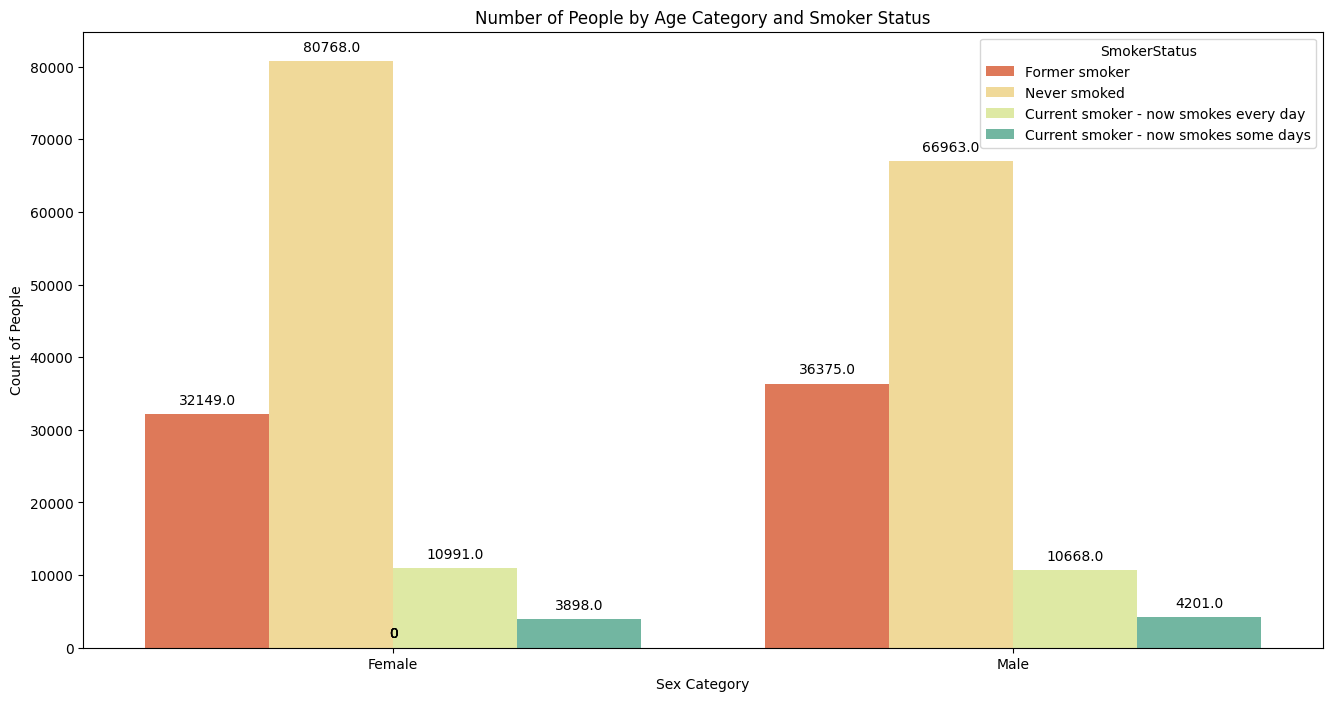

In [67]:
# Sex 
#Heart Attack Yes and No Together for Smoke

plt.figure(figsize=(16, 8))
ax=sns.countplot(x='Sex', hue='SmokerStatus', data=df, palette='Spectral')

# Add number labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of People by Age Category and Smoker Status')
plt.xlabel('Sex Category')
plt.ylabel('Count of People')
plt.show()

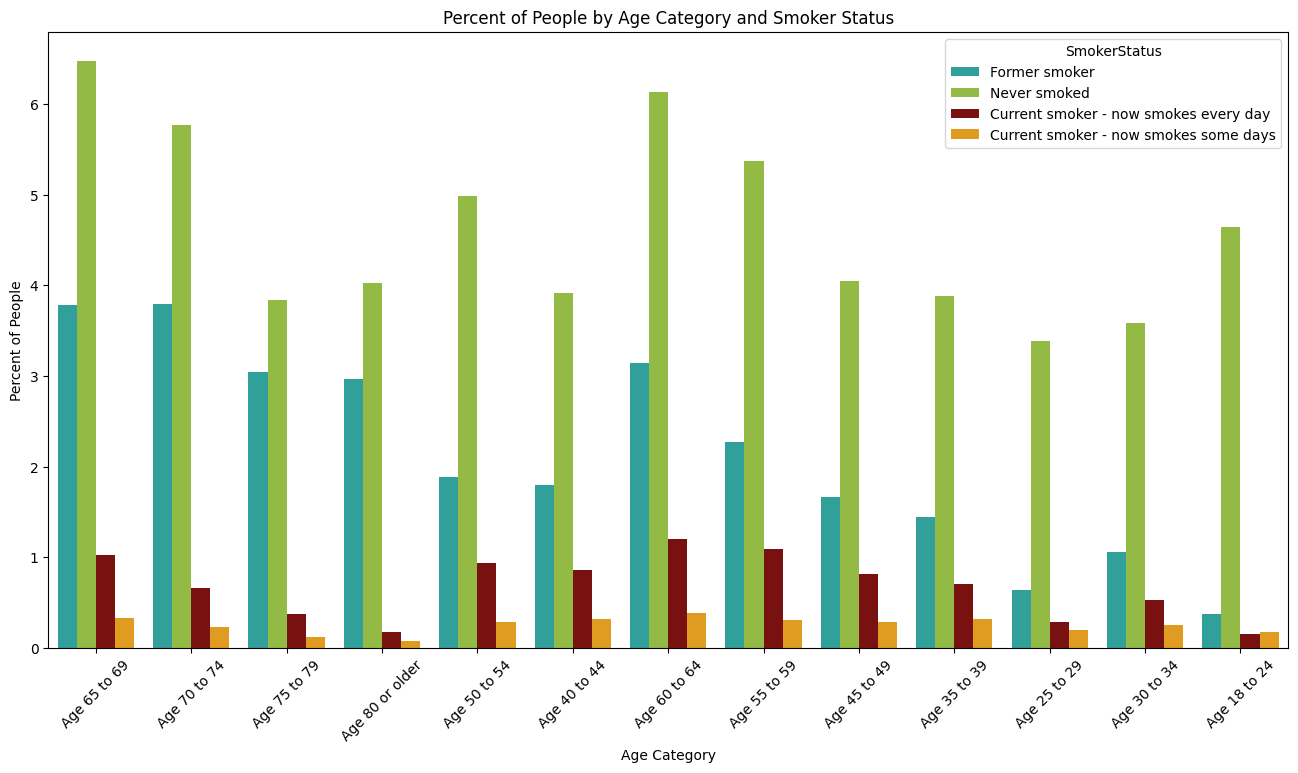

In [68]:
#Heart Attack Yes and No Together for Smoke
#Percent

# Define your custom color palette
custom_palette = {'Never smoked': 'yellowgreen', 
                  'Former smoker': 'lightseagreen', 
                  'Current smoker - now smokes every day': 'darkred', 
                  'Current smoker - now smokes some days': 'orange'}

plt.figure(figsize=(16, 8))
sns.countplot(x='AgeCategory', hue='SmokerStatus', data=df,palette=custom_palette,stat='percent')

plt.title('Percent of People by Age Category and Smoker Status')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.ylabel('Percent of People')
plt.show()

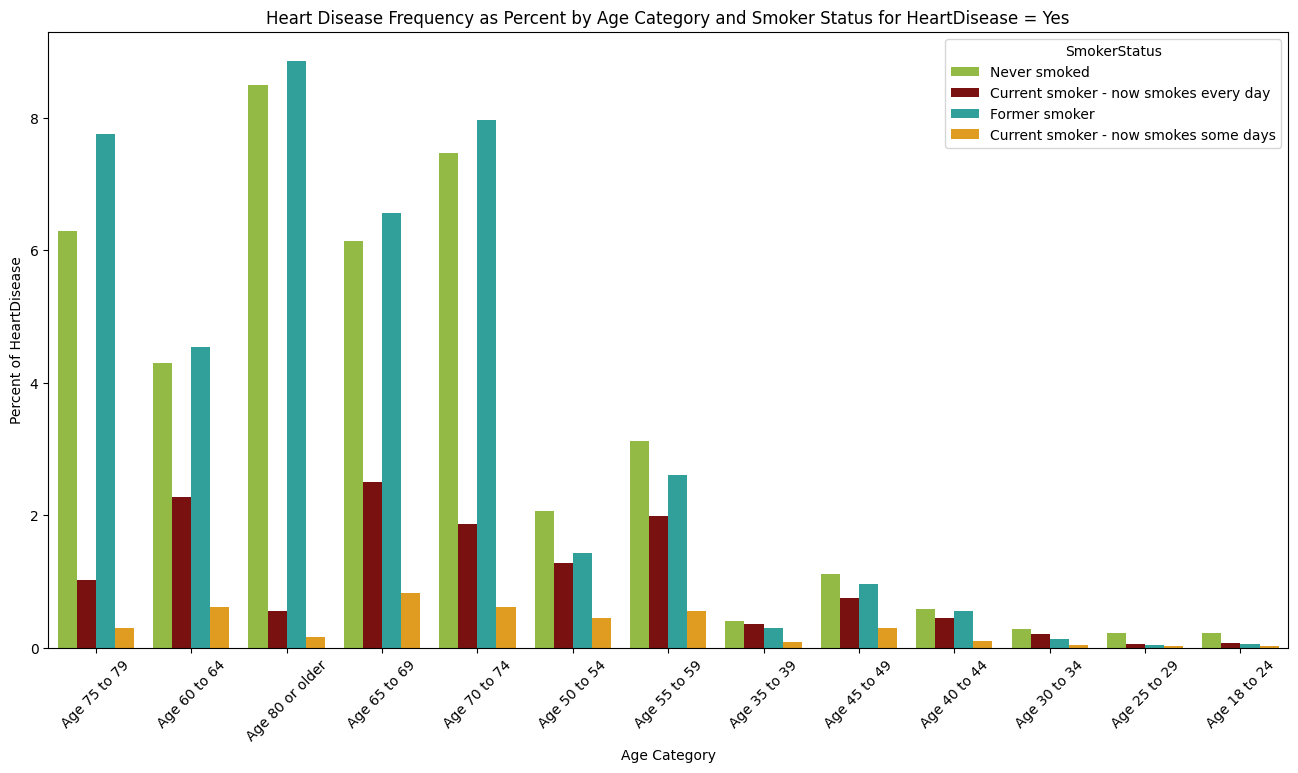

In [69]:
# Filter the DataFrame where 'HadHeartAttack' is 'Yes'
#Percent

df_filtered = df[df['HadHeartAttack'] == 'Yes']


plt.figure(figsize=(16, 8))
sns.color_palette("rocket")
sns.countplot(x='AgeCategory', hue='SmokerStatus', data=df_filtered,stat='percent',palette=custom_palette)
plt.title('Heart Disease Frequency as Percent by Age Category and Smoker Status for HeartDisease = Yes')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.ylabel('Percent of HeartDisease')
plt.show()

**New column for smokers**

In [70]:

df['SmokerStatus_New'] = np.where(df['SmokerStatus'].isin(['Former smoker', 'Current smoker - now smokes every day', 'Current smoker - now smokes some days']), 'Smoker', 'Not Smoker')

# Display the DataFrame with the new column
df.SmokerStatus_New

342           Smoker
343           Smoker
345           Smoker
346       Not Smoker
347       Not Smoker
             ...    
445117    Not Smoker
445123    Not Smoker
445124    Not Smoker
445128    Not Smoker
445130    Not Smoker
Name: SmokerStatus_New, Length: 246013, dtype: object

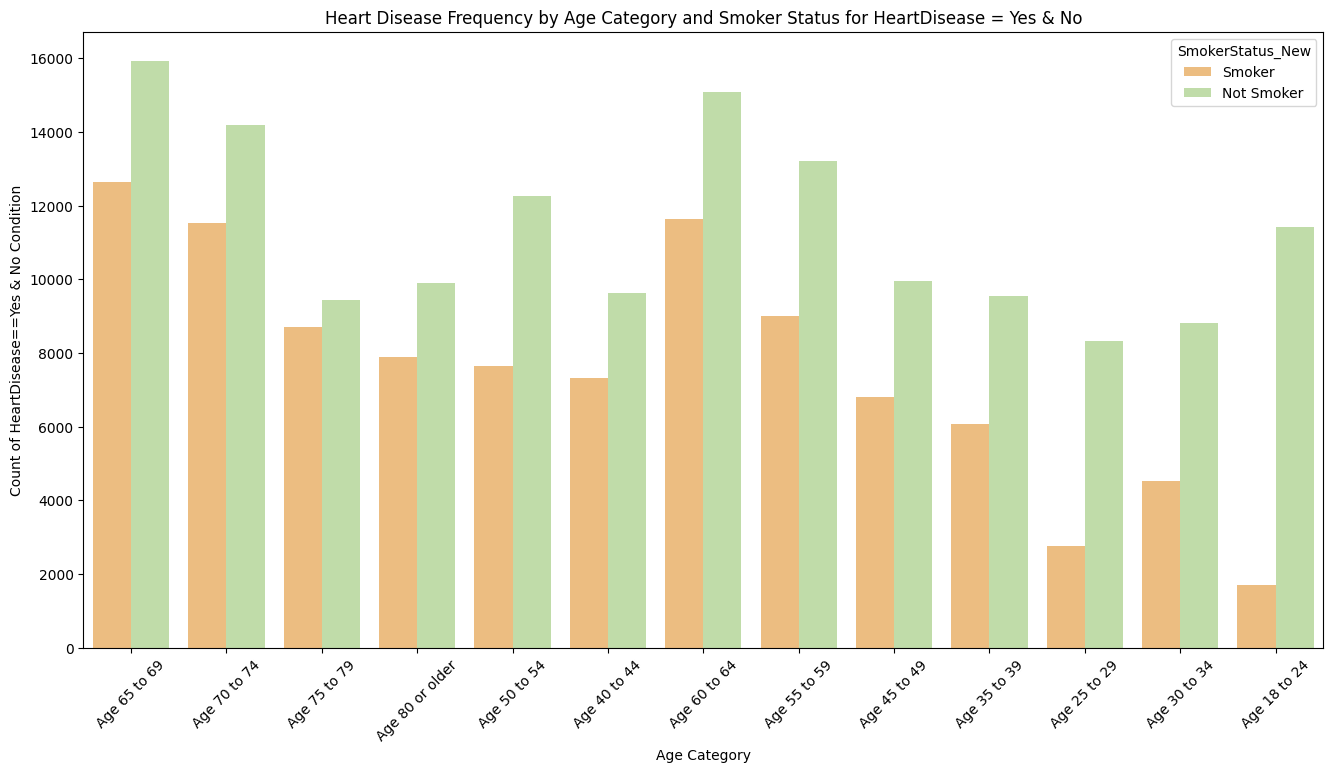

In [72]:
# Filter the DataFrame where 'HadHeartAttack' is all together



plt.figure(figsize=(16, 8))
sns.countplot(x='AgeCategory', hue='SmokerStatus_New', data=df, palette='Spectral')
plt.title('Heart Disease Frequency by Age Category and Smoker Status for HeartDisease = Yes & No')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.ylabel('Count of HeartDisease==Yes & No Condition')
plt.show()

**The effect of quitting smoking later**

Count of HadHeartAttack==Yes Condition

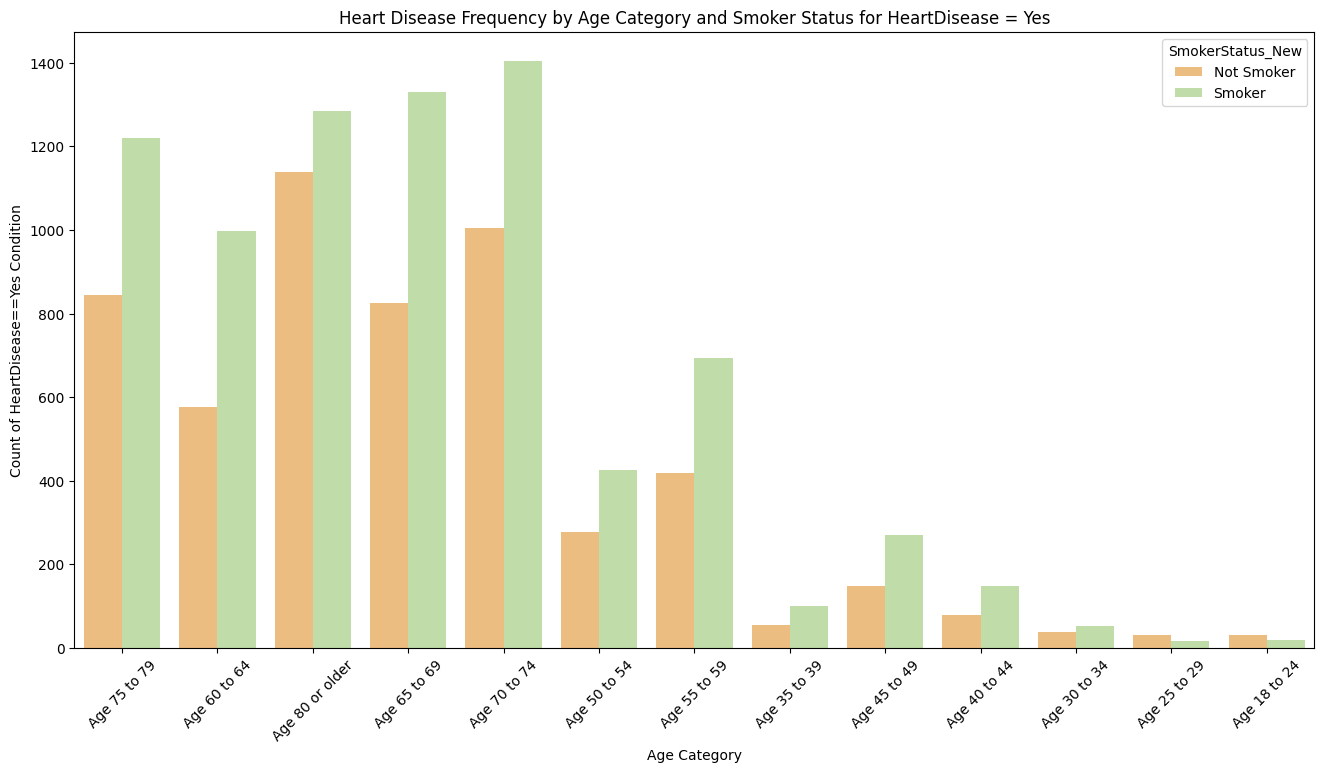

In [ ]:

# Filter the DataFrame where 'HadHeartAttack' is 'Yes'

df_filtered = df[df['HadHeartAttack'] == 'Yes']


plt.figure(figsize=(16, 8))
sns.countplot(x='AgeCategory', hue='SmokerStatus_New', data=df_filtered, palette='Spectral')
# Add number labels on top of each bar


plt.title('Heart Disease Frequency by Age Category and Smoker Status for HeartDisease = Yes')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.ylabel('Count of HeartDisease==Yes Condition')
plt.show()

**Percent of HadHeartAttack==Yes Condition**

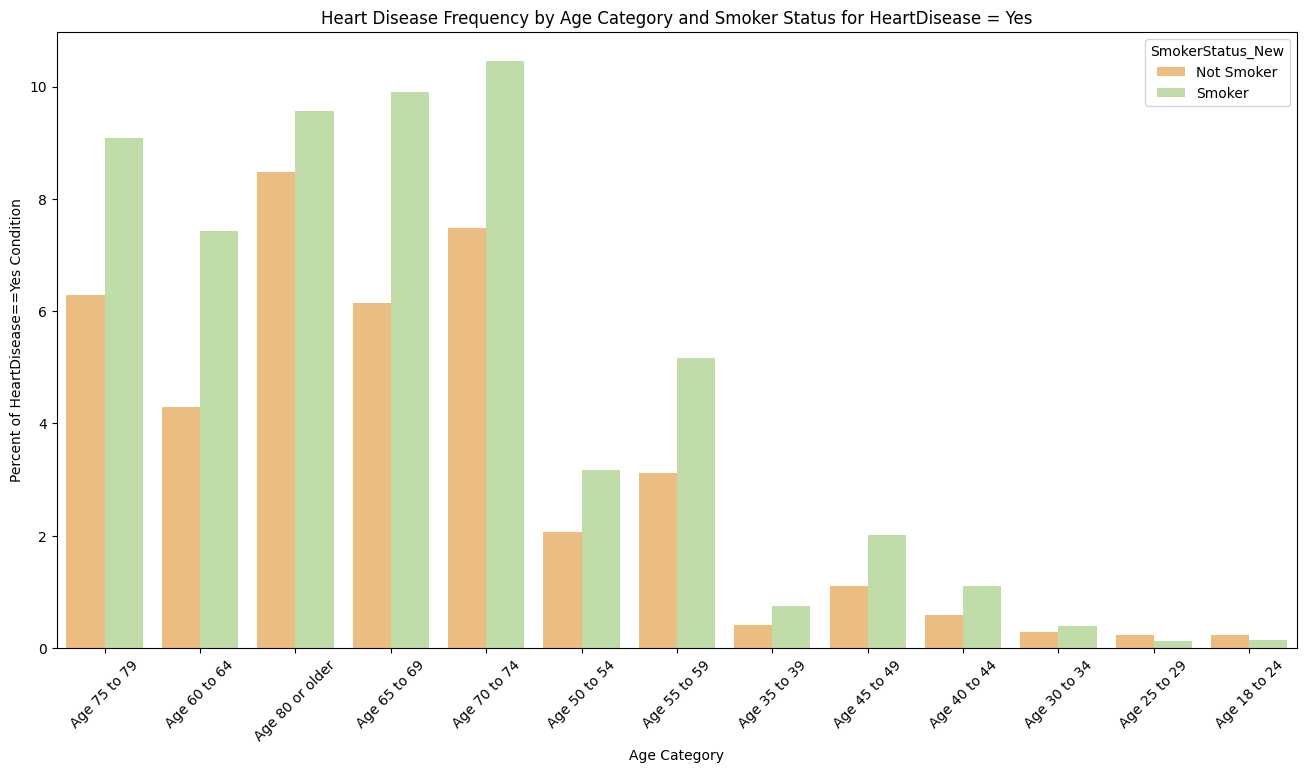

In [ ]:
# Filter the DataFrame where 'HadHeartAttack' is 'Yes'

df_filtered = df[df['HadHeartAttack'] == 'Yes']


plt.figure(figsize=(16, 8))
sns.countplot(x='AgeCategory', hue='SmokerStatus_New', data=df_filtered, palette='Spectral',stat="percent")
plt.title('Heart Disease Frequency by Age Category and Smoker Status for HeartDisease = Yes')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.ylabel('Percent of HeartDisease==Yes Condition')
plt.show()

##### Alkol Status

We cant say directly has relation heart disease and alcohol status

In [ ]:
#the count of people Smoking
df['AlcoholDrinkers'].value_counts()

AlcoholDrinkers
Yes    135299
No     110714
Name: count, dtype: int64

In [ ]:
df.groupby(['Sex','AgeCategory','AlcoholDrinkers','HadHeartAttack'])['HadHeartAttack'].count()

Sex     AgeCategory      AlcoholDrinkers  HadHeartAttack
Female  Age 18 to 24     No               No                2451
                                          Yes                  9
                         Yes              No                3141
                                          Yes                  4
        Age 25 to 29     No               No                1812
                                                            ... 
Male    Age 75 to 79     Yes              Yes                607
        Age 80 or older  No               No                3036
                                          Yes                806
                         Yes              No                3015
                                          Yes                603
Name: HadHeartAttack, Length: 104, dtype: int64

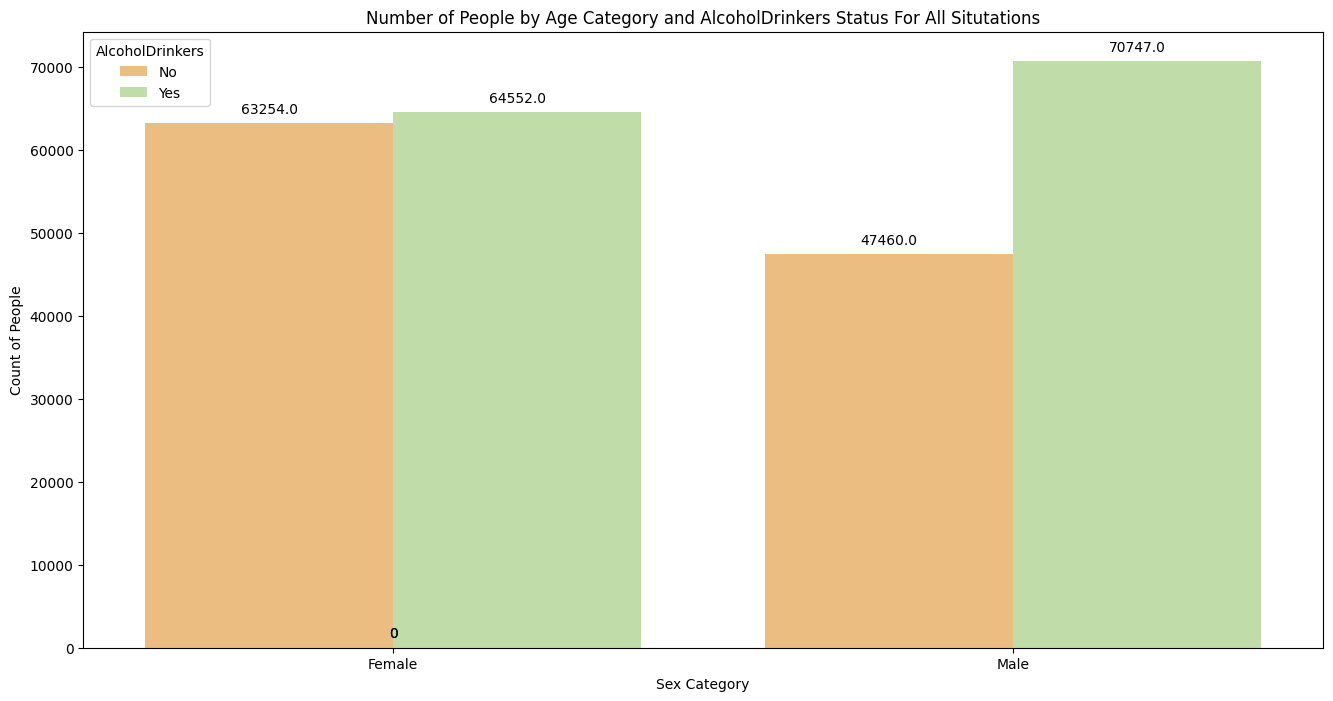

In [ ]:
# Sex 
#Heart Attack Yes and No Together for Alcohol

plt.figure(figsize=(16, 8))
ax=sns.countplot(x='Sex', hue='AlcoholDrinkers', data=df, palette='Spectral')

# Add number labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of People by Age Category and AlcoholDrinkers Status For All Situtations')
plt.xlabel('Sex Category')
plt.ylabel('Count of People')
plt.show()

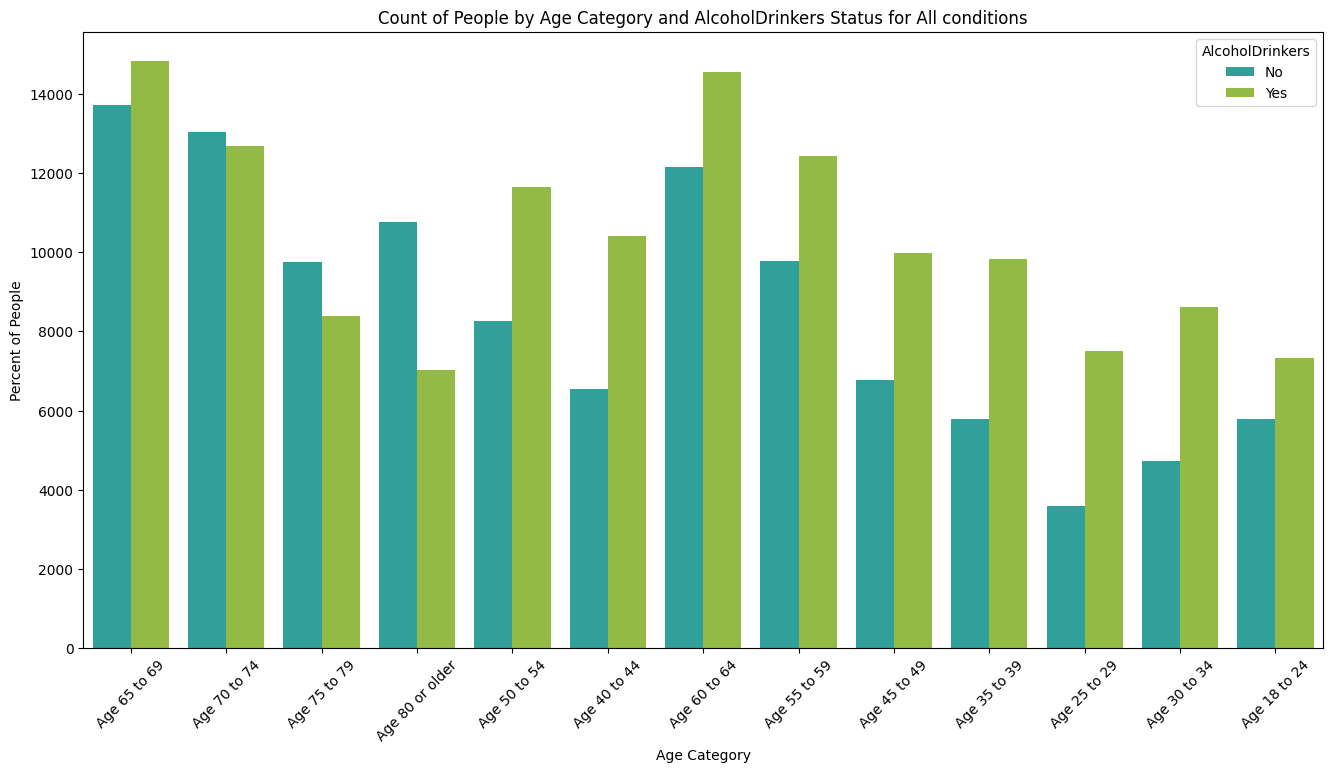

In [ ]:
#Heart Attack Yes and No Together for Alcohol
#Percent

# Define your custom color palette
custom_palette = {'Yes': 'yellowgreen', 
                  'No': 'lightseagreen'}

plt.figure(figsize=(16, 8))
sns.countplot(x='AgeCategory', hue='AlcoholDrinkers', data=df,palette=custom_palette)

plt.title('Count of People by Age Category and AlcoholDrinkers Status for All conditions')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.ylabel('Percent of People')
plt.show()

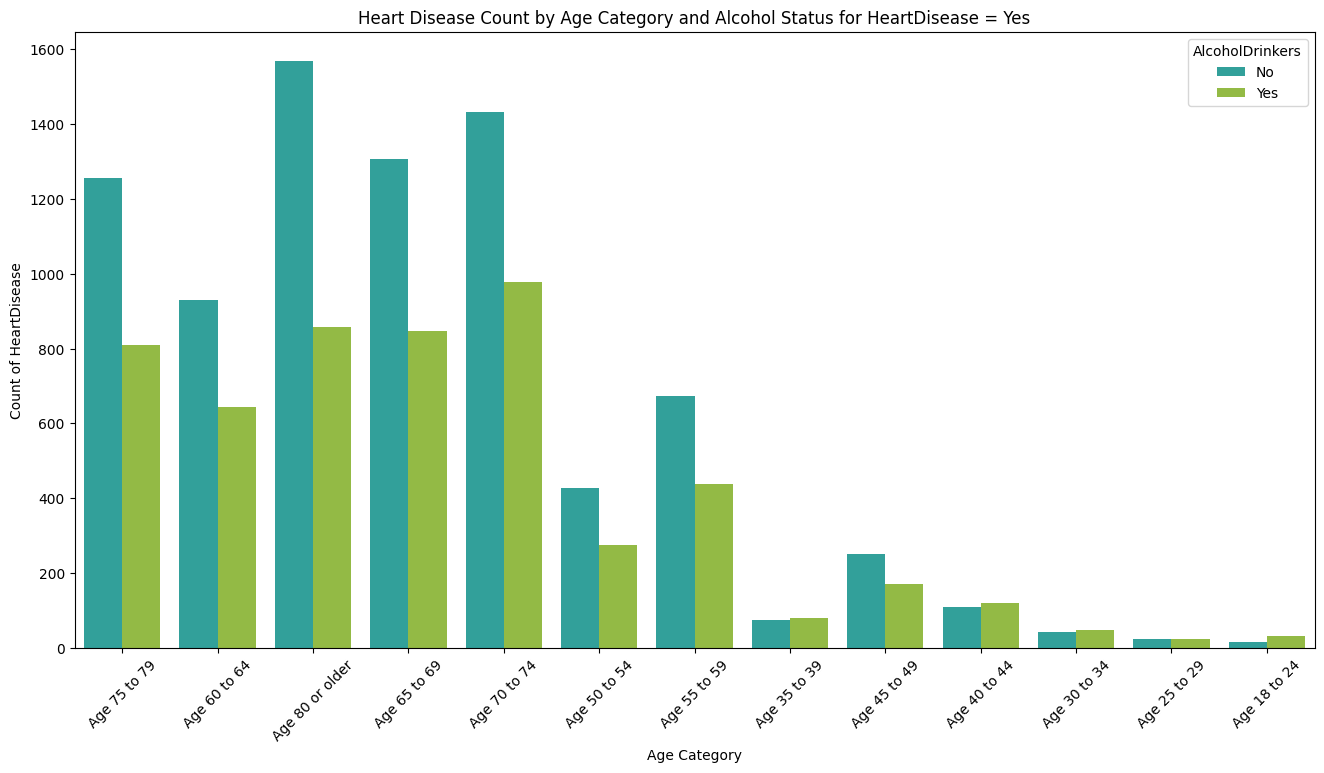

In [ ]:
# Filter the DataFrame where 'HadHeartAttack' is 'Yes'
#Percent

df_filtered = df[df['HadHeartAttack'] == 'Yes']


plt.figure(figsize=(16, 8))
sns.color_palette("rocket")
sns.countplot(x='AgeCategory', hue='AlcoholDrinkers', data=df_filtered,palette=custom_palette)
plt.title('Heart Disease Count by Age Category and Alcohol Status for HeartDisease = Yes')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.ylabel('Count of HeartDisease')
plt.show()

##### BMI Effect

BMI  (Body Mass Index)

- under 18.5 – This is described as underweight. 
- between 18.5 and 24.9 – This is described as the ‘healthy range’.
- between 25 and 29.9 – This is described as overweight
- between 30 and 39.9 – This is described as obesity
- 40 or over – This is described as severe obesity

There are no acceptable results for heart attack yes and all conditions

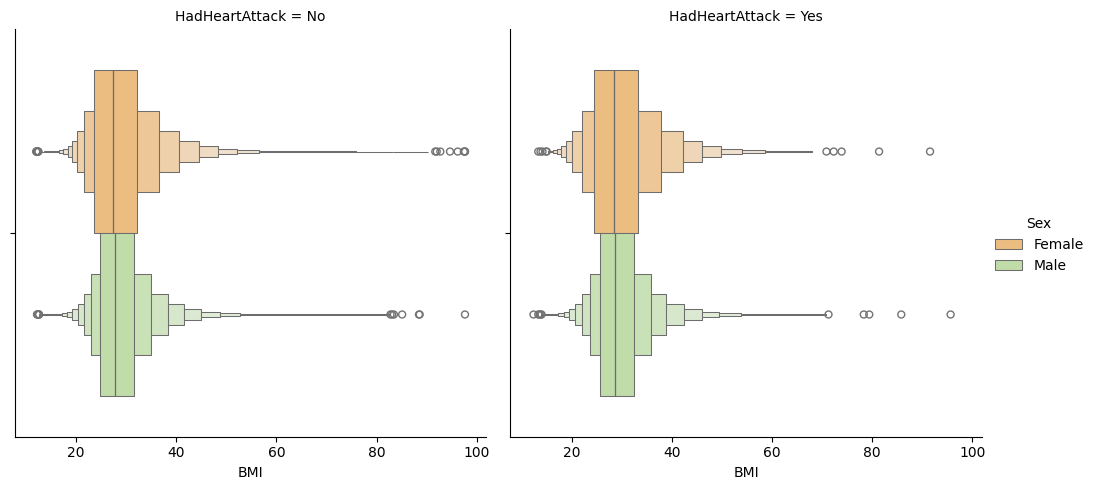

In [ ]:
ax=sns.catplot(x='BMI', hue='Sex', col='HadHeartAttack', kind='boxen',data=df, palette='Spectral')

plt.show()

##### Deaf and Blind Effect

There are no any relation.

In [ ]:
print(df['DeafOrHardOfHearing'].value_counts())
df['BlindOrVisionDifficulty'].value_counts()


DeafOrHardOfHearing
No     224981
Yes     21032
Name: count, dtype: int64


BlindOrVisionDifficulty
No     233787
Yes     12226
Name: count, dtype: int64

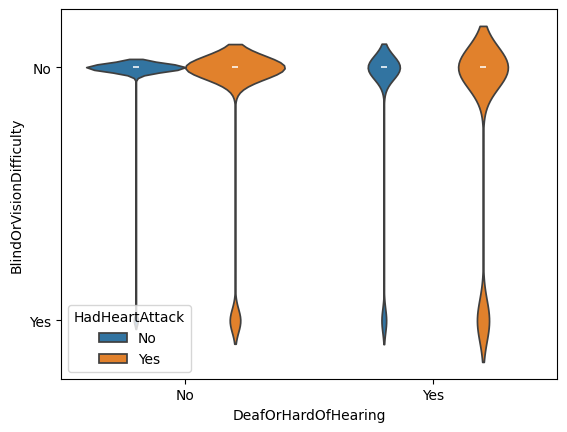

In [ ]:
# plot violin chart
sns.violinplot( x='DeafOrHardOfHearing',y= "BlindOrVisionDifficulty",hue="HadHeartAttack",data=df)
#sns.violinplot( x='BlindOrVisionDifficulty', data=df)

# show the graph
plt.show()

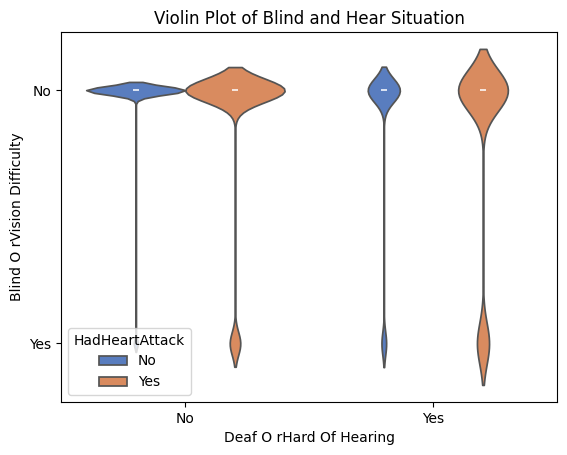

In [ ]:
# Plot violin chart with split by 'HadHeartAttack' and 'DeafOrHardOfHearing', hue by 'AgeCategory'
sns.violinplot(x='DeafOrHardOfHearing', y='BlindOrVisionDifficulty', hue='HadHeartAttack', data=df, palette='muted')

# Set plot title and labels
plt.title("Violin Plot of Blind and Hear Situation")
plt.xlabel("Deaf O rHard Of Hearing")
plt.ylabel("Blind O rVision Difficulty")

# Show the plot
plt.show()

##### General Physical Health Disease Search by Heart Disease

Bulgular : 
- Genel hastalıklar ve sonuçlarına baktığımızda hadheartattack==Yes and hadheartattack==Yes & No conditionları inceledik. Gördük ki Göğüs ağrısı ve eklem ağrıları sigara kullananlarda ortak olarak yüksek. 
- Bunlar arasındaki ilişkiye baktığımızda ise ; hadheartattack==Yes durumunda ; 
    - eklem  ağrısına sahip olan kişilerin büyük bir çoğunluğunun göğüs ağrısına da sahip olduğunu görmekteyiz.

In [74]:


Health_Disease = ['HadHeartAttack','HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 
                      'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 
                      'HadArthritis', 'HadDiabetes']

# Create a new DataFrame by concatenating selected columns
Health_Disease_df = pd.concat([df[col] for col in Health_Disease], axis=1)

# Display the new DataFrame
Health_Disease_df

,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes
342,No,No,No,No,No,No,No,No,Yes,No
343,No,No,No,No,No,No,No,No,Yes,Yes
345,No,No,No,No,No,No,No,No,Yes,No
346,No,No,No,No,Yes,No,Yes,No,Yes,No
347,No,No,No,No,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
445117,No,No,No,No,No,No,No,No,No,No
445123,No,No,No,No,No,No,Yes,No,No,No
445124,No,No,Yes,No,No,No,No,No,Yes,Yes
445128,No,No,No,No,No,No,No,No,No,No


**Health Disease==Yes & No Condition**

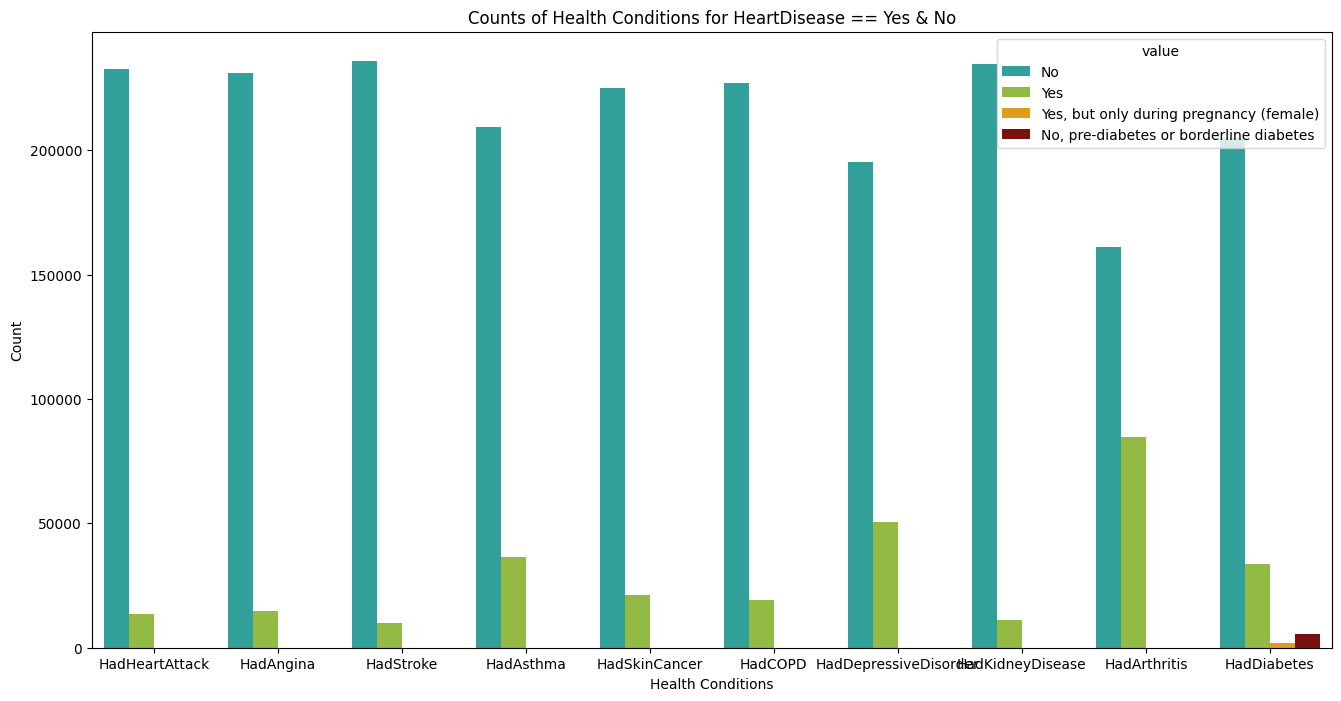

'pd.melt to reshape the DataFrame and then creates a bar plot using sns.barplot'

In [75]:
# Define your custom color palette
custom_palette = {'Yes': 'yellowgreen', 
                  'No': 'lightseagreen', 
                  'No, pre-diabetes or borderline diabetes': 'darkred', 
                  'Yes, but only during pregnancy (female)': 'orange'}

# Reshape the DataFrame using melt
melted_df_t = pd.melt(df[Health_Disease])

# Create a count plot
plt.figure(figsize=(16, 8))
sns.countplot(x='variable', hue='value', data=melted_df_t, palette=custom_palette)
plt.title('Counts of Health Conditions for HeartDisease == Yes & No')
plt.xlabel('Health Conditions')
plt.ylabel('Count')
plt.show()

"""pd.melt to reshape the DataFrame and then creates a bar plot using sns.barplot"""

**Health Disease==Yes condition**

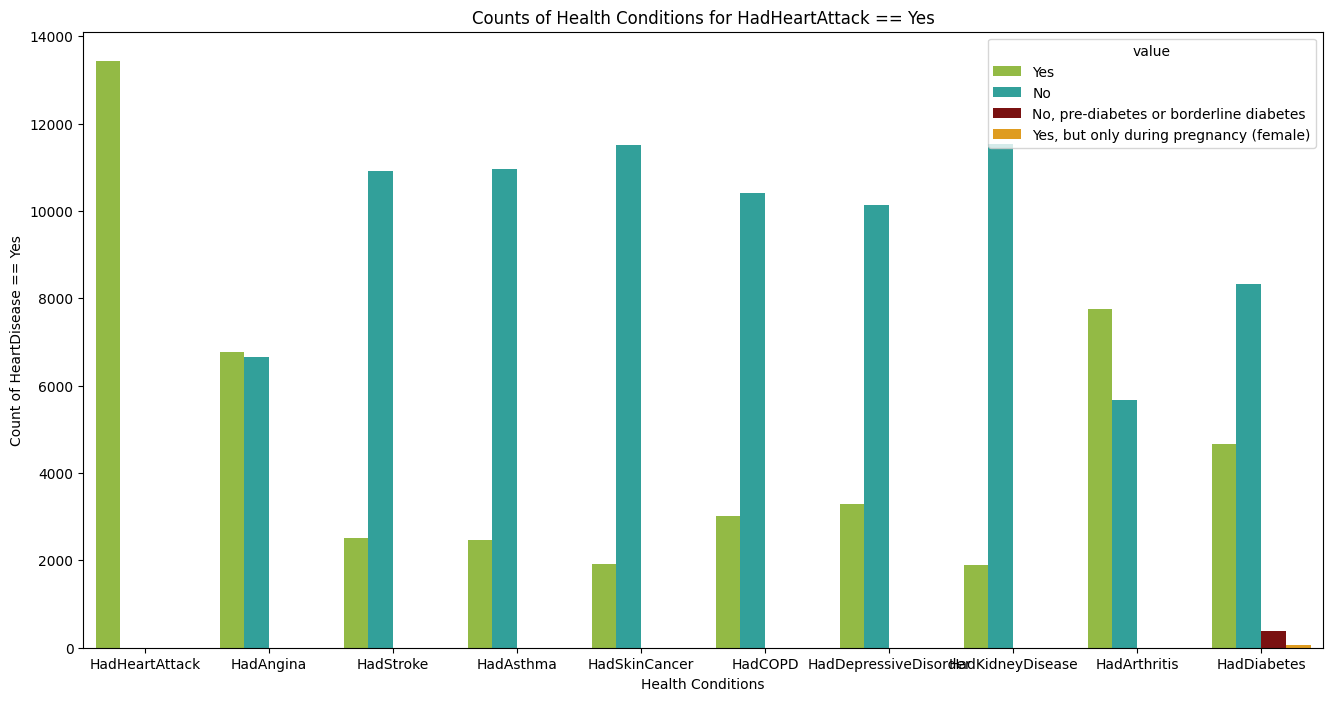

In [76]:
# I want to analyze ['HadHeartAttack'] == 'Yes' condition
df_filtered = df[df['HadHeartAttack'] == 'Yes']

# Reshape the DataFrame using melt
melted_df = pd.melt(df_filtered[Health_Disease])

# Create a count plot
plt.figure(figsize=(16, 8))
sns.countplot(x='variable', hue='value', data=melted_df, palette=custom_palette)
plt.title('Counts of Health Conditions for HadHeartAttack == Yes')
plt.xlabel('Health Conditions')
plt.ylabel('Count of HeartDisease == Yes')
plt.show()

In [ ]:
Health_Disease_df['HadDiabetes'].value_counts()

HadDiabetes
No                                         204827
Yes                                         33811
No, pre-diabetes or borderline diabetes      5392
Yes, but only during pregnancy (female)      1983
Name: count, dtype: int64

hadheartattack==Yes & No durumunda eklem ağrısı ve göğüs ağrısı ilişkisi

I can analyze ;
- HadAngine (Göğüs Ağrısı) & Had Artritis (Eklem İltihaplanması)

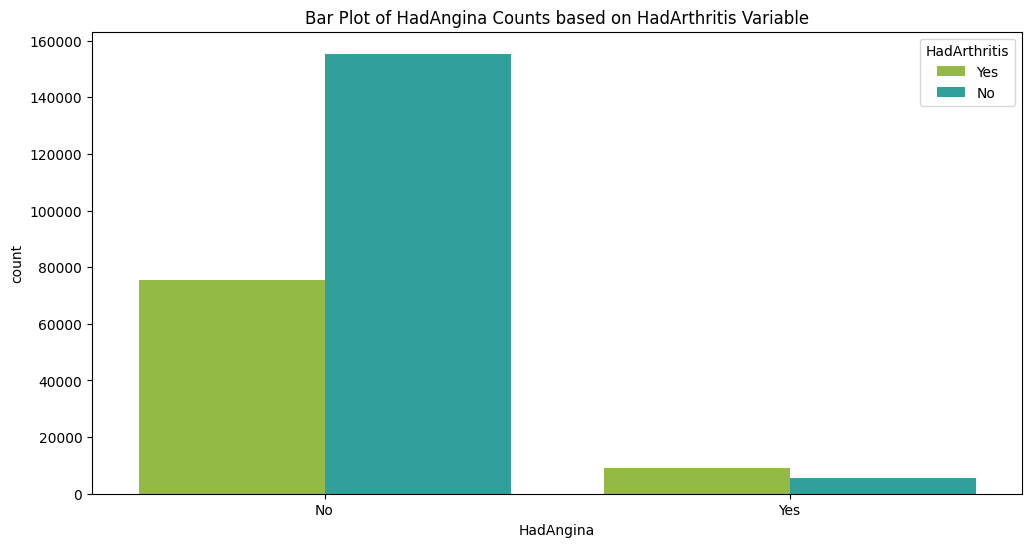

In [ ]:

# Bar plot of HadAngina counts based on another categorical variable
plt.figure(figsize=(12, 6))
sns.countplot(x='HadAngina', hue='HadArthritis', data=Health_Disease_df,palette=custom_palette)
plt.title('Bar Plot of HadAngina Counts based on HadArthritis Variable')
plt.show()

hadheartattack==Yes durumunda eklem ağrısı ve göğüs ağrısı ilişkisi

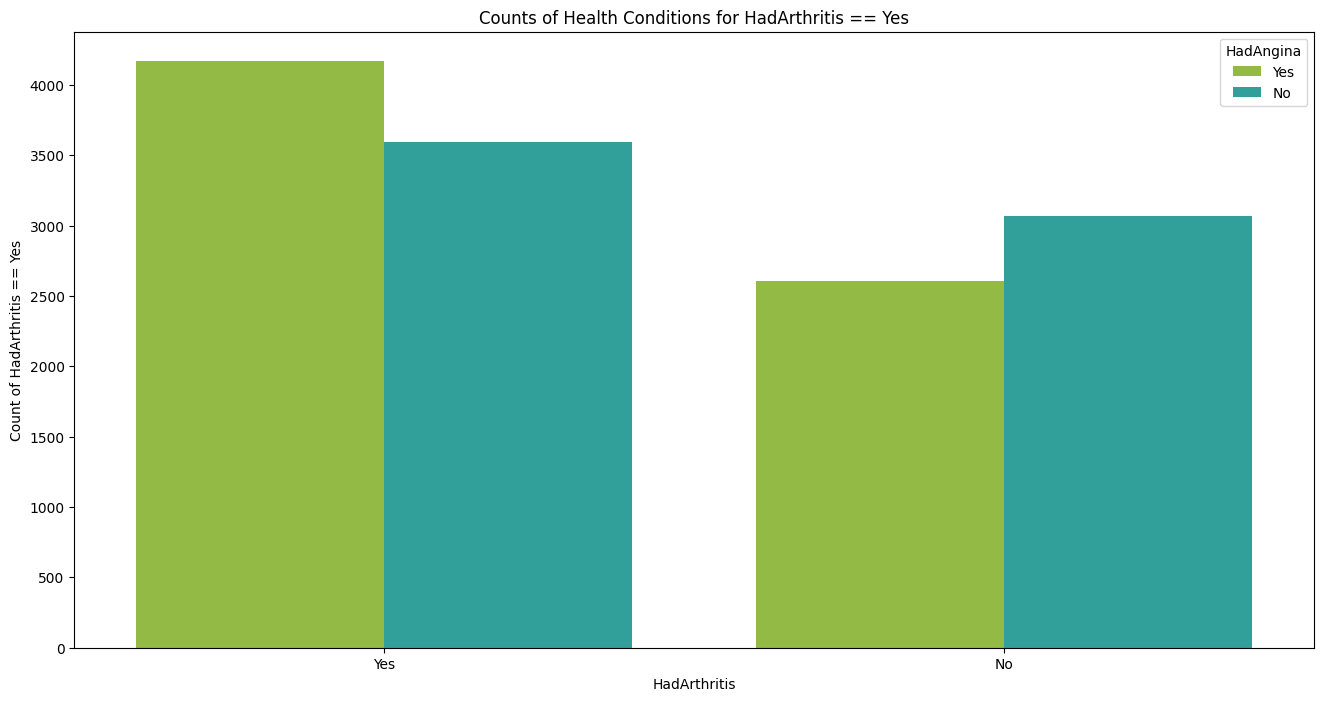

In [ ]:
# Filter the DataFrame for 'HadHeartAttack' == 'Yes'
df_filtered = df[df['HadHeartAttack'] == 'Yes']

# Create a count plot
plt.figure(figsize=(16, 8))
sns.countplot(x='HadArthritis', hue='HadAngina', data=df_filtered, palette=custom_palette)
plt.title('Counts of Health Conditions for HadArthritis == Yes')
plt.xlabel('HadArthritis')
plt.ylabel('Count of HadArthritis == Yes')
plt.show()

##### Daily Work Analysis

In [77]:
Daily_Works=['HadHeartAttack','DifficultyConcentrating','DifficultyWalking','DifficultyDressingBathing',
             'DifficultyErrands']

In [78]:
# Create a new DataFrame by concatenating selected columns
Daily_Works_df = pd.concat([df[col] for col in Daily_Works], axis=1)

# Display the new DataFrame
Daily_Works_df

,HadHeartAttack,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands
342,No,No,No,No,No
343,No,No,No,No,No
345,No,No,Yes,No,No
346,No,No,Yes,No,No
347,No,No,No,No,No
...,...,...,...,...,...
445117,No,No,No,No,No
445123,No,No,No,No,No
445124,No,No,No,No,No
445128,No,No,No,No,No


In [79]:
Daily_Works_df.describe()

,HadHeartAttack,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands
count,246013,246013,246013,246013,246013
unique,2,2,2,2,2
top,No,No,No,No,No
freq,232578,219793,209945,237673,229629


**Daily_Works == Yes & No Condition**

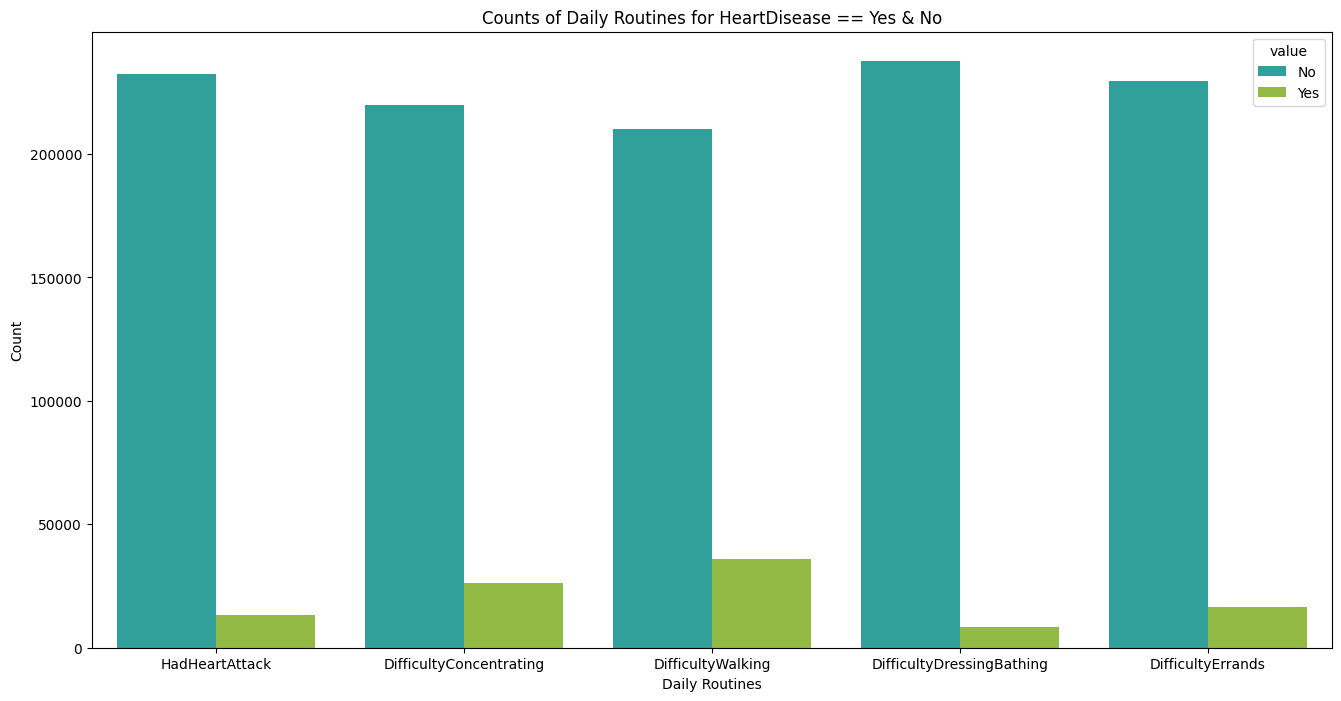

In [80]:
# Reshape the DataFrame using melt
melted_df_d = pd.melt(df[Daily_Works])

# Create a count plot
plt.figure(figsize=(16, 8))
sns.countplot(x='variable', hue='value', data=melted_df_d, palette=custom_palette)
plt.title('Counts of Daily Routines for HeartDisease == Yes & No')
plt.xlabel('Daily Routines')
plt.ylabel('Count')
plt.show()

**Daily_Works == Yes Condition**

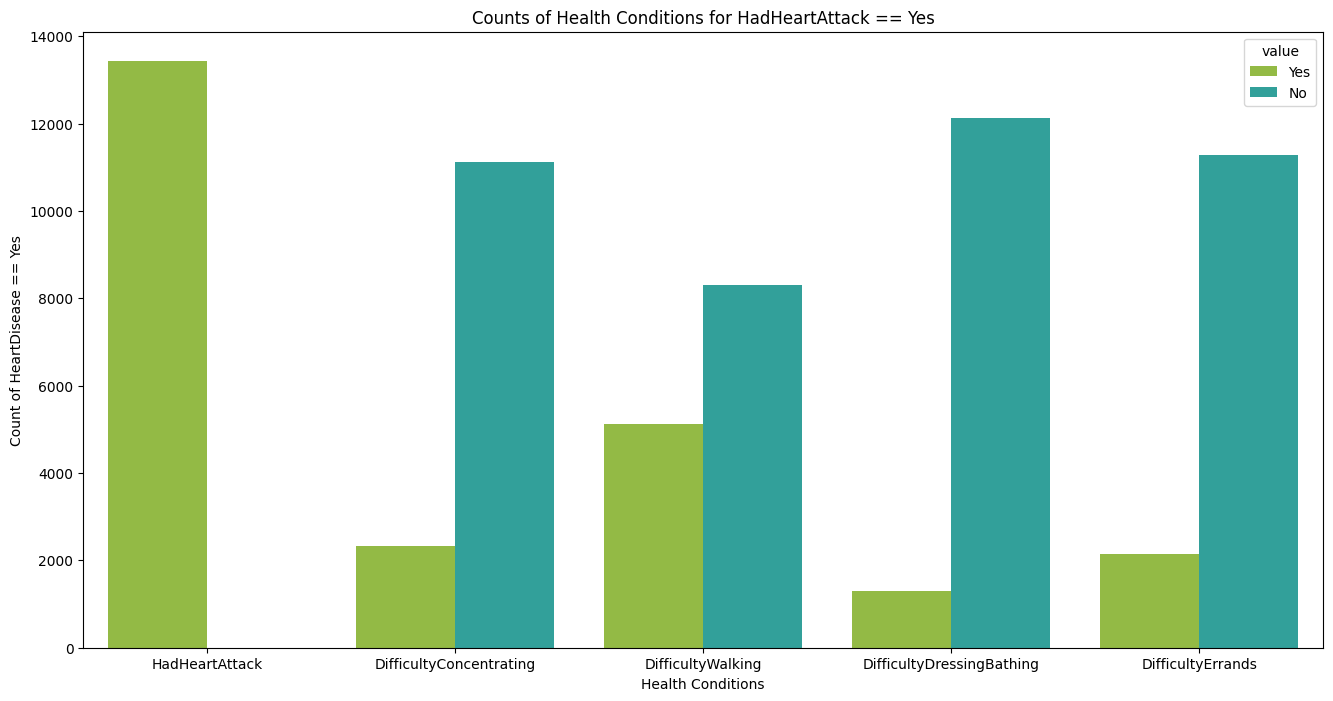

In [81]:
# I want to analyze ['HadHeartAttack'] == 'Yes' condition
df_filtered = df[df['HadHeartAttack'] == 'Yes']

# Reshape the DataFrame using melt
melted_df_d = pd.melt(df_filtered[Daily_Works])

# Create a count plot
plt.figure(figsize=(16, 8))
sns.countplot(x='variable', hue='value', data=melted_df_d, palette=custom_palette)
plt.title('Counts of Health Conditions for HadHeartAttack == Yes')
plt.xlabel('Health Conditions')
plt.ylabel('Count of HeartDisease == Yes')
plt.show()

##### Vaccine

- Tetanoz ve menanjit aşısı (PneumoVaxEver- Akciğer İltihaplanması) Amerikada zorunlu değildir. 
- ==Yes&No conditionlarda ; 
    - Bir çok kişini gözle görülebilir şekilde tetanoz aşısı olduğunu gözlemlemekteyiz. PneuoVax (menenjit aşısı) diğerlerine nazaran daha az ve fluvax kafa kafaya. 
- ==Yes conditionda ; 
    - Aşıların gözle görülebilir bi etkisi olduğunu söyleyebiliriz fakat menenjit aşısı gözle görülebilir bir şekilde HadHeartAttack sayılarını etkilemiş. Aşı sayıları birbirine çok yakın fakat kişiler analiz edildiğinde çok tekrarlı durumlar gözükmemekte ;
   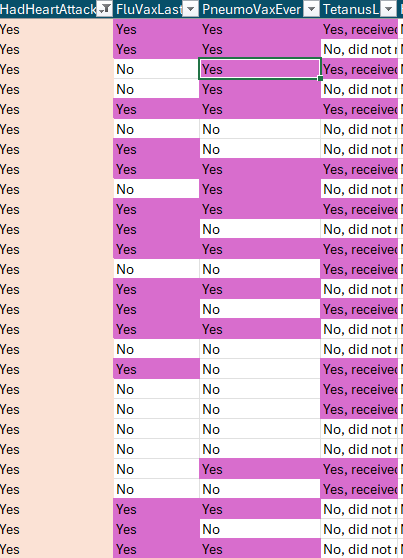

In [84]:

Vaccine = ['HadHeartAttack','FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap']

# Create a new DataFrame by concatenating selected columns
Vaccine_df = pd.concat([df[col] for col in Vaccine], axis=1)

# Display the new DataFrame
Vaccine_df

,HadHeartAttack,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap
342,No,Yes,Yes,"Yes, received Tdap"
343,No,Yes,Yes,"Yes, received tetanus shot but not sure what type"
345,No,No,Yes,"No, did not receive any tetanus shot in the pa..."
346,No,Yes,Yes,"No, did not receive any tetanus shot in the pa..."
347,No,Yes,Yes,"No, did not receive any tetanus shot in the pa..."
...,...,...,...,...
445117,No,No,No,"Yes, received tetanus shot but not sure what type"
445123,No,No,No,"No, did not receive any tetanus shot in the pa..."
445124,No,Yes,Yes,"Yes, received tetanus shot but not sure what type"
445128,No,Yes,No,"Yes, received tetanus shot but not sure what type"


In [85]:
Vaccine_df.describe()

,HadHeartAttack,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap
count,246013,246013,246013,246013
unique,2,2,2,4
top,No,Yes,No,"No, did not receive any tetanus shot in the pa..."
freq,232578,131188,146128,81743


In [86]:
Vaccine_df['TetanusLast10Tdap'].value_counts()

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    81743
Yes, received tetanus shot but not sure what type            74118
Yes, received Tdap                                           70282
Yes, received tetanus shot, but not Tdap                     19870
Name: count, dtype: int64

In [87]:
#Turn as yes and no
Vaccine_df['TetanusLast10']=np.where(df['TetanusLast10Tdap'].isin(['No, did not receive any tetanus shot in the past 10 years']),'No','Yes')


In [88]:
Vaccine_df.TetanusLast10.value_counts()

TetanusLast10
Yes    164270
No      81743
Name: count, dtype: int64

In [89]:
#Drop TetanusLast10Tdap

Vaccine_df=Vaccine_df.drop("TetanusLast10Tdap",axis="columns")

In [90]:
Vaccine_df.describe()

,HadHeartAttack,FluVaxLast12,PneumoVaxEver,TetanusLast10
count,246013,246013,246013,246013
unique,2,2,2,2
top,No,Yes,No,Yes
freq,232578,131188,146128,164270


**Vaccine==Yes & No Condition**

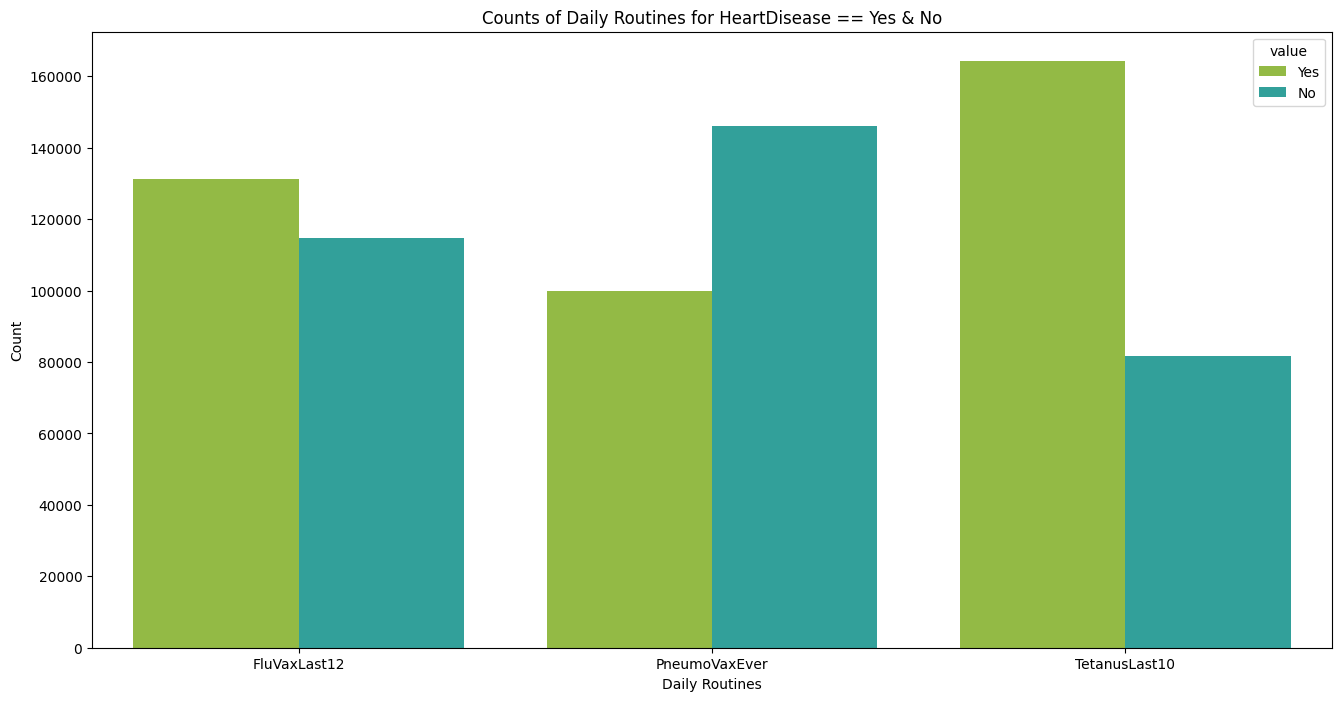

In [91]:
# Reshape the DataFrame using melt
melted_df_v = Vaccine_df.melt(id_vars=["HadHeartAttack"])

# Create a count plot
plt.figure(figsize=(16, 8))
sns.countplot(x='variable', hue='value', data=melted_df_v, palette=custom_palette)
plt.title('Counts of Daily Routines for HeartDisease == Yes & No')
plt.xlabel('Daily Routines')
plt.ylabel('Count')
plt.show()

**Vaccine==Yes  Condition**

In [92]:
# Apply the filtering condition
df_filtered = Vaccine_df[Vaccine_df['HadHeartAttack'] == 'Yes']

# Print the filtered DataFrame to check its content
df_filtered



,HadHeartAttack,FluVaxLast12,PneumoVaxEver,TetanusLast10
352,Yes,Yes,Yes,No
364,Yes,Yes,Yes,Yes
422,Yes,Yes,Yes,Yes
425,Yes,Yes,No,Yes
435,Yes,Yes,Yes,Yes
...,...,...,...,...
444921,Yes,No,Yes,Yes
444966,Yes,No,No,Yes
445107,Yes,No,No,No
445115,Yes,Yes,No,Yes


In [93]:
# Reshape the DataFrame using melt
melted_df = df_filtered.melt(id_vars=["HadHeartAttack"])
#"HadHeartAttack", "FluVaxLast12", "PneumoVaxEver", "TetanusLast10"

#Print
melted_df

,HadHeartAttack,variable,value
0,Yes,FluVaxLast12,Yes
1,Yes,FluVaxLast12,Yes
2,Yes,FluVaxLast12,Yes
3,Yes,FluVaxLast12,Yes
4,Yes,FluVaxLast12,Yes
...,...,...,...
40300,Yes,TetanusLast10,Yes
40301,Yes,TetanusLast10,Yes
40302,Yes,TetanusLast10,No
40303,Yes,TetanusLast10,Yes


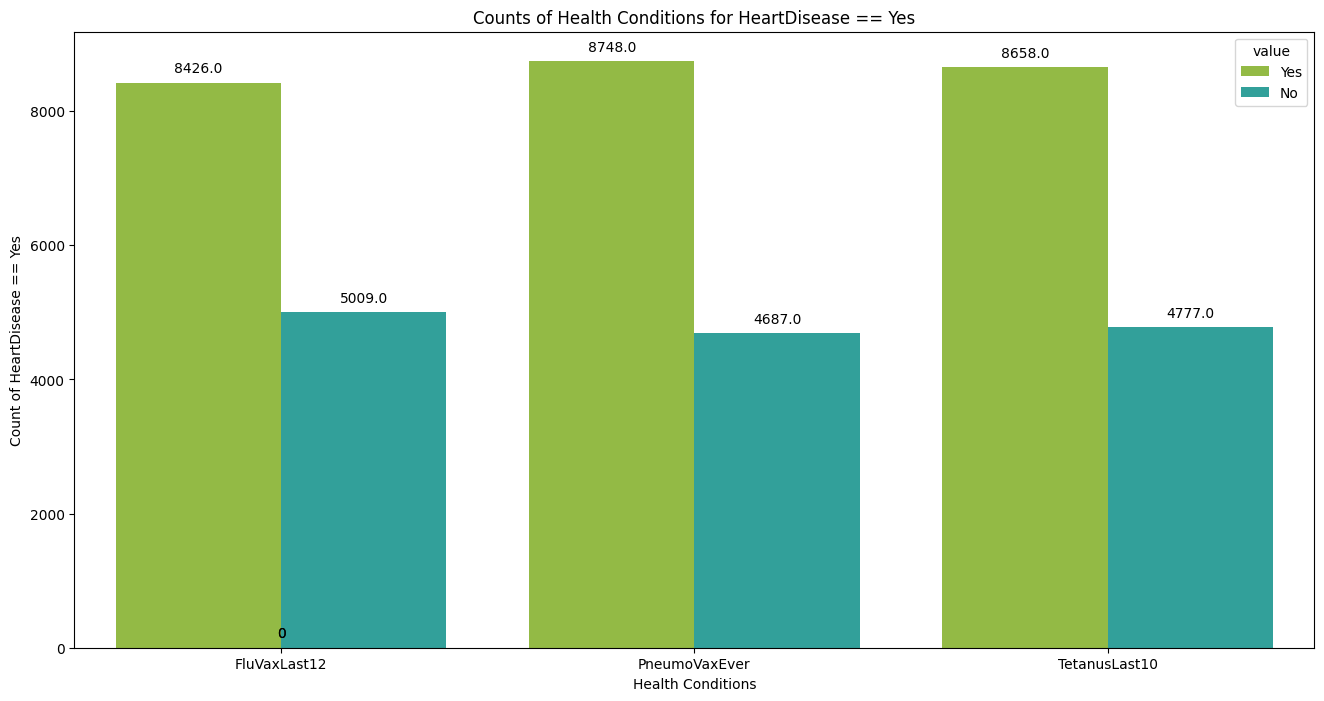

In [96]:
# Create a count plot
plt.figure(figsize=(16, 8))
ax=sns.countplot(x='variable', hue='value', data=melted_df, palette=custom_palette)

# Add number labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Counts of Health Conditions for HeartDisease == Yes')
plt.xlabel('Health Conditions')
plt.ylabel('Count of HeartDisease == Yes')
plt.show()

In [ ]:
df.RaceEthnicityCategory.value_counts()

RaceEthnicityCategory
White only, Non-Hispanic         186327
Hispanic                          22570
Black only, Non-Hispanic          19330
Other race only, Non-Hispanic     12205
Multiracial, Non-Hispanic          5581
Name: count, dtype: int64

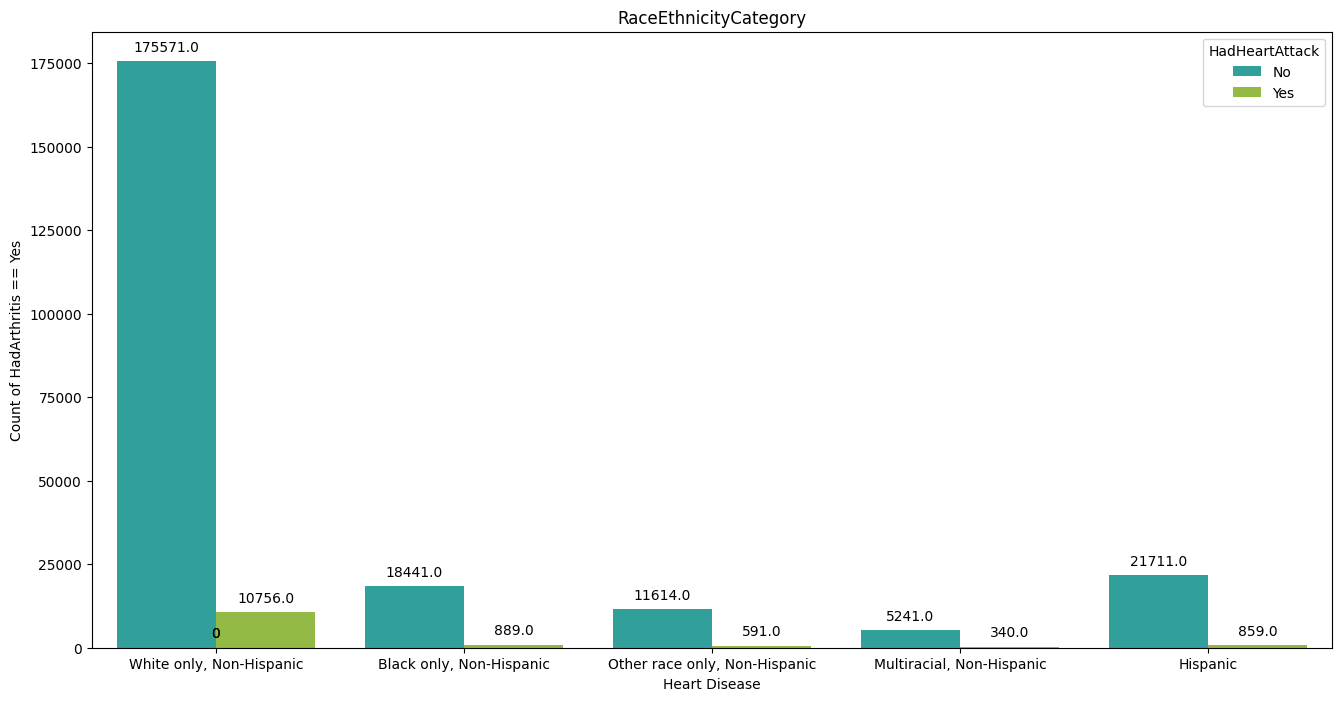

In [98]:


# Create a count plot
plt.figure(figsize=(16, 8))
ax=sns.countplot(x='RaceEthnicityCategory', hue='HadHeartAttack', data=df, palette=custom_palette)


# Add number labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('RaceEthnicityCategory')
plt.xlabel('Heart Disease')
plt.ylabel('Count of HadArthritis == Yes')
plt.show()

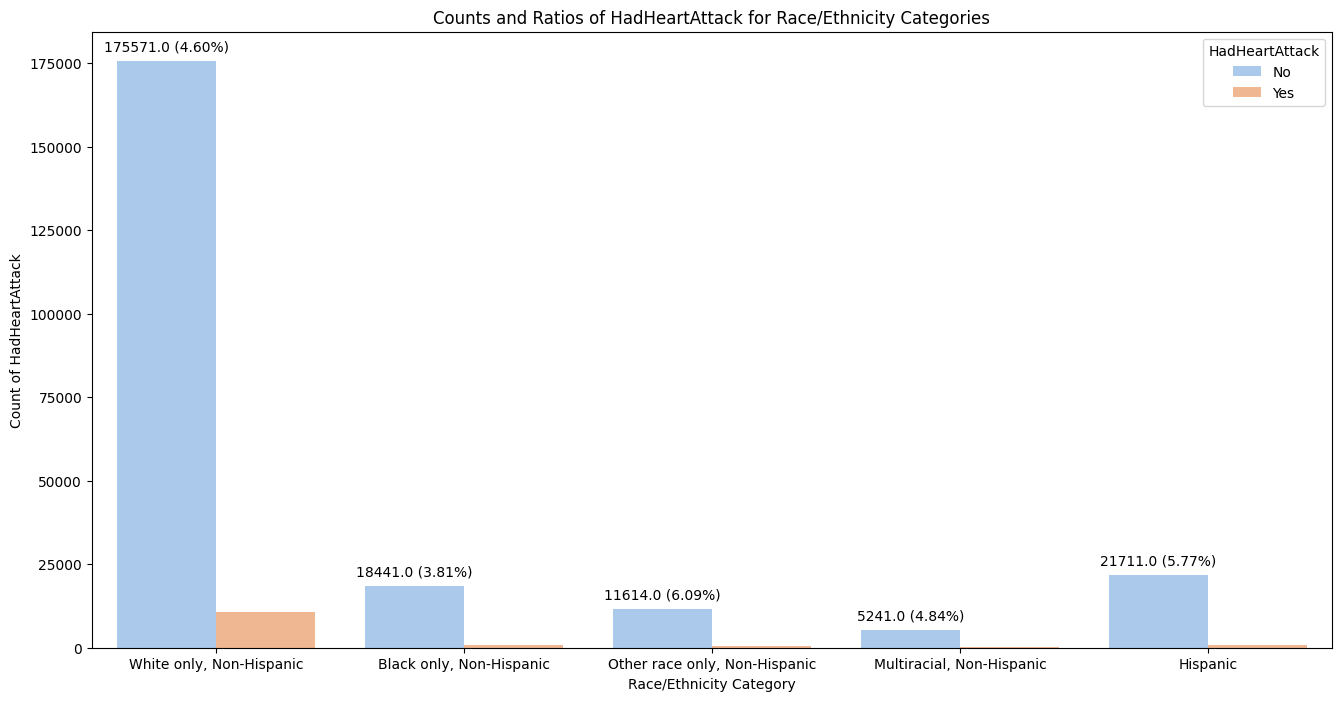

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='RaceEthnicityCategory', hue='HadHeartAttack', data=df, palette='pastel')

# Calculate ratios
total_counts = df.groupby('RaceEthnicityCategory')['HadHeartAttack'].count()
yes_counts = df[df['HadHeartAttack'] == 'Yes'].groupby('RaceEthnicityCategory')['HadHeartAttack'].count()
ratios = yes_counts / total_counts

# Add number and ratio labels on top of each bar
for p, ratio in zip(ax.patches, ratios):
    ax.annotate(f'{p.get_height()} ({ratio:.2%})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Counts and Ratios of HadHeartAttack for Race/Ethnicity Categories')
plt.xlabel('Race/Ethnicity Category')
plt.ylabel('Count of HadHeartAttack')
plt.legend(title='HadHeartAttack', loc='upper right')
plt.show()

## 4. Feature Engineering

State , pyhsical and mental health -- > 0.92-->0.94

In [127]:
feature_columns=['Sex','AgeCategory','GeneralHealth','SmokerStatus'
,'HadHeartAttack','HadAngina','HadArthritis',
            'FluVaxLast12','PneumoVaxEver','TetanusLast10Tdap']

# Create a new DataFrame by concatenating selected columns
df_feature = pd.concat([df[col] for col in feature_columns], axis=1)

# Display the new DataFrame

df_feature

,Sex,AgeCategory,GeneralHealth,SmokerStatus,HadHeartAttack,HadAngina,HadArthritis,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap
342,Female,Age 65 to 69,Very good,Former smoker,No,No,Yes,Yes,Yes,"Yes, received Tdap"
343,Male,Age 70 to 74,Very good,Former smoker,No,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type"
345,Male,Age 75 to 79,Very good,Former smoker,No,No,Yes,No,Yes,"No, did not receive any tetanus shot in the pa..."
346,Female,Age 80 or older,Fair,Never smoked,No,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa..."
347,Female,Age 80 or older,Good,Never smoked,No,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa..."
...,...,...,...,...,...,...,...,...,...,...
445117,Male,Age 60 to 64,Very good,Never smoked,No,No,No,No,No,"Yes, received tetanus shot but not sure what type"
445123,Female,Age 25 to 29,Fair,Never smoked,No,No,No,No,No,"No, did not receive any tetanus shot in the pa..."
445124,Male,Age 65 to 69,Good,Never smoked,No,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type"
445128,Female,Age 50 to 54,Excellent,Never smoked,No,No,No,Yes,No,"Yes, received tetanus shot but not sure what type"


In [120]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Sex                246013 non-null  object
 1   AgeCategory        246013 non-null  object
 2   GeneralHealth      246013 non-null  object
 3   SmokerStatus       246013 non-null  object
 4   HadHeartAttack     246013 non-null  object
 5   HadAngina          246013 non-null  object
 6   HadArthritis       246013 non-null  object
 7   FluVaxLast12       246013 non-null  object
 8   PneumoVaxEver      246013 non-null  object
 9   TetanusLast10Tdap  246013 non-null  object
dtypes: object(10)
memory usage: 20.6+ MB


In [121]:
for i in df_feature:
    print(df_feature[i].value_counts())
    print("\n")

Sex
Female    127806
Male      118207
Name: count, dtype: int64


AgeCategory
Age 65 to 69       28555
Age 60 to 64       26719
Age 70 to 74       25737
Age 55 to 59       22224
Age 50 to 54       19912
Age 75 to 79       18133
Age 80 or older    17816
Age 40 to 44       16973
Age 45 to 49       16753
Age 35 to 39       15614
Age 30 to 34       13346
Age 18 to 24       13122
Age 25 to 29       11109
Name: count, dtype: int64


GeneralHealth
Very good    86996
Good         77407
Excellent    41522
Fair         30658
Poor          9430
Name: count, dtype: int64


SmokerStatus
Never smoked                             147731
Former smoker                             68524
Current smoker - now smokes every day     21659
Current smoker - now smokes some days      8099
Name: count, dtype: int64


HadHeartAttack
No     232578
Yes     13435
Name: count, dtype: int64


HadAngina
No     231060
Yes     14953
Name: count, dtype: int64


HadArthritis
No     161132
Yes     84881
Name: count, dtype: i

In [122]:
# Tetanoz Editing

#Turn as yes and no
df_feature['TetanusLast10']=np.where(df['TetanusLast10Tdap'].isin(['No, did not receive any tetanus shot in the past 10 years']),'No','Yes')

#Drop TetanusLast10Tdap

df_feature=df_feature.drop("TetanusLast10Tdap",axis="columns")

In [123]:
df_feature['TetanusLast10'].value_counts()

TetanusLast10
Yes    164270
No      81743
Name: count, dtype: int64

In [128]:
# Smoke Editing
df_feature['smokeStat']=np.where(df['SmokerStatus'].isin(['Never smoked']),'No','Yes')

df_feature=df_feature.drop("SmokerStatus",axis="columns")

In [129]:
df_feature['smokeStat'].value_counts()

smokeStat
No     147731
Yes     98282
Name: count, dtype: int64

In [130]:
# Age Editing
age_ranges = {
    'Age 18 to 24': 'Young',
    'Age 25 to 29': 'Young',
    'Age 30 to 34': 'Young',
    'Age 35 to 39': 'Middle Age',
    'Age 40 to 44': 'Middle Age',
    'Age 45 to 49': 'Middle Age',
    'Age 50 to 54': 'Middle Age',
    'Age 55 to 59': 'Older Age',
    'Age 60 to 64': 'Older Age',
    'Age 65 to 69': 'Older Age',
    'Age 70 to 74': 'Older Age',
    'Age 75 to 79': 'Older Age',
    'Age 80 or older': 'Older Age',
}

# Map age ranges to categories
df_feature['Age'] = df_feature['AgeCategory'].map(age_ranges)

# Drop the original 'Age' column if needed
df_feature = df_feature.drop("AgeCategory", axis="columns")


In [131]:
df_feature['Age'].value_counts()

Age
Older Age     139184
Middle Age     69252
Young          37577
Name: count, dtype: int64

## 5. Model Selection

### Encoding categorical data

In [132]:
label=LabelEncoder()
for col in df_feature:
    df_feature[col]=label.fit_transform(df_feature[col])
df_feature 

,Sex,GeneralHealth,HadHeartAttack,HadAngina,HadArthritis,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,smokeStat,Age
342,0,4,0,0,1,1,1,1,1,1
343,1,4,0,0,1,1,1,2,1,1
345,1,4,0,0,1,0,1,0,1,1
346,0,1,0,0,1,1,1,0,0,1
347,0,2,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
445117,1,4,0,0,0,0,0,2,0,1
445123,0,1,0,0,0,0,0,0,0,2
445124,1,2,0,0,1,1,1,2,0,1
445128,0,0,0,0,0,1,0,2,0,0


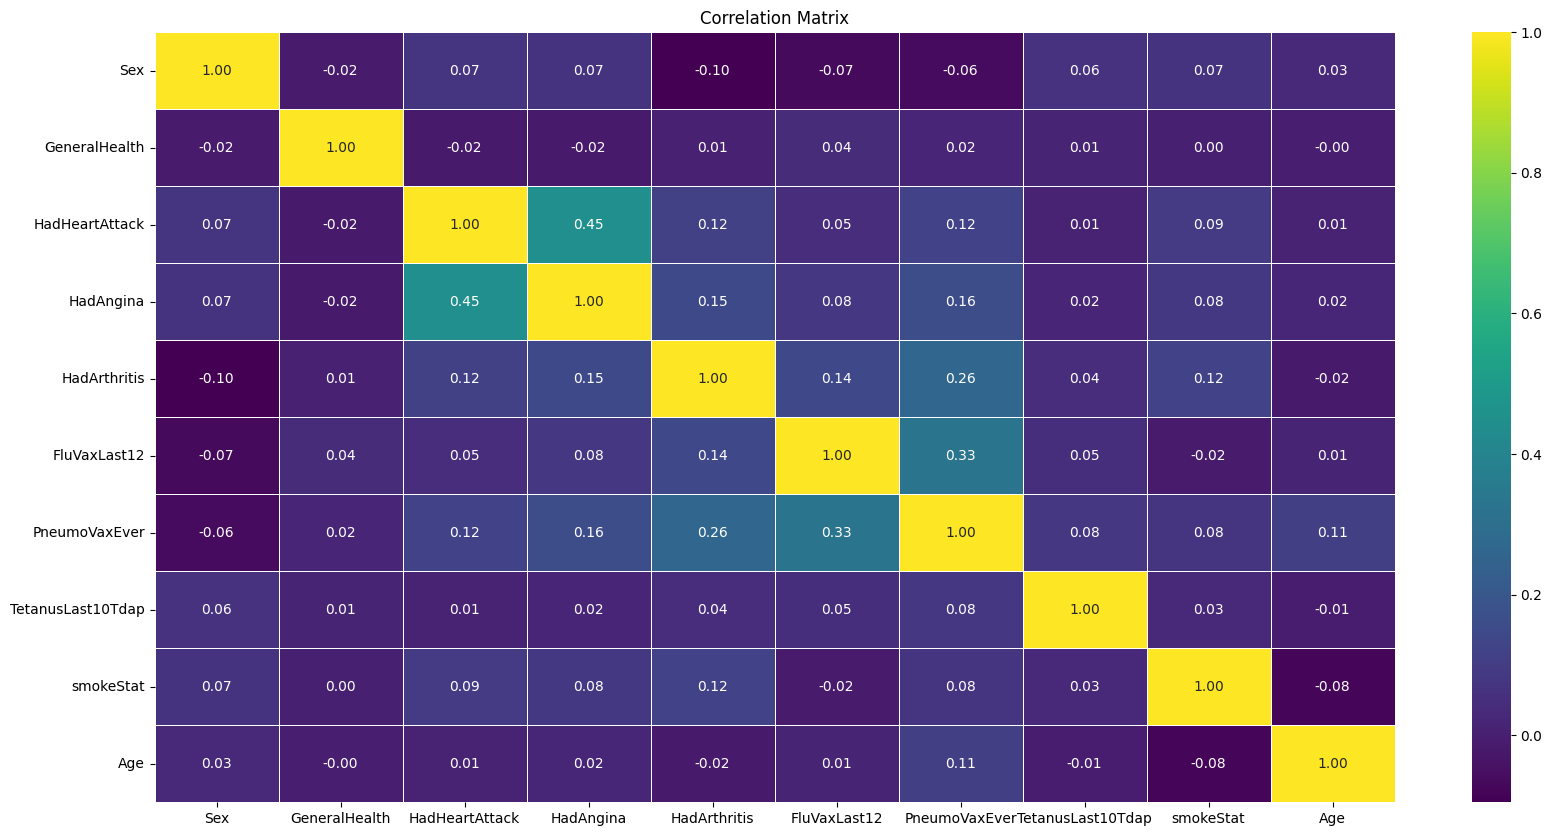

In [133]:
#Correlation

# Calculate the correlation matrix
correlation_matrix = df_feature.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

### Split and Normalize the Dataset

In [134]:
# 1 Normalizing & Splitting the Data
# Split the data into features (X) and target (y)
X = df_feature.drop("HadHeartAttack",axis=1) #independent variables except HadHeartAttack #
y = df_feature["HadHeartAttack"].astype('int') #dependent variable as int

In [135]:
# from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Quick Testing For ideal Models**

In [136]:
# Define the models
models = [KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(),RandomForestClassifier()]
# Rest of the code remains the same
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

 
# Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store scores in the dictionary
    scores[str(m)] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
    print(f'Precission_score: {precision_score(y_test, y_pred)}')
    print(f'Recall_score: {recall_score(y_test, y_pred)}')
    print(f'F1-score: {f1_score(y_test, y_pred)}')
    print('-'*30, '\n')


model: KNeighborsClassifier()
Accuracy_score: 0.9440887750746906
Precission_score: 0.45754716981132076
Recall_score: 0.22020431328036322
F1-score: 0.2973180076628353
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.9464057069690872
Precission_score: 0.5023183925811437
Recall_score: 0.24593265228906547
F1-score: 0.33020066040132084
------------------------------ 

model: DecisionTreeClassifier()
Accuracy_score: 0.9469747779606934
Precission_score: 0.515625
Recall_score: 0.2122587968217934
F1-score: 0.30072366657732513
------------------------------ 

model: RandomForestClassifier()
Accuracy_score: 0.9469138060687357
Precission_score: 0.5134665508253693
Recall_score: 0.22360953461975028
F1-score: 0.3115445440168687
------------------------------ 



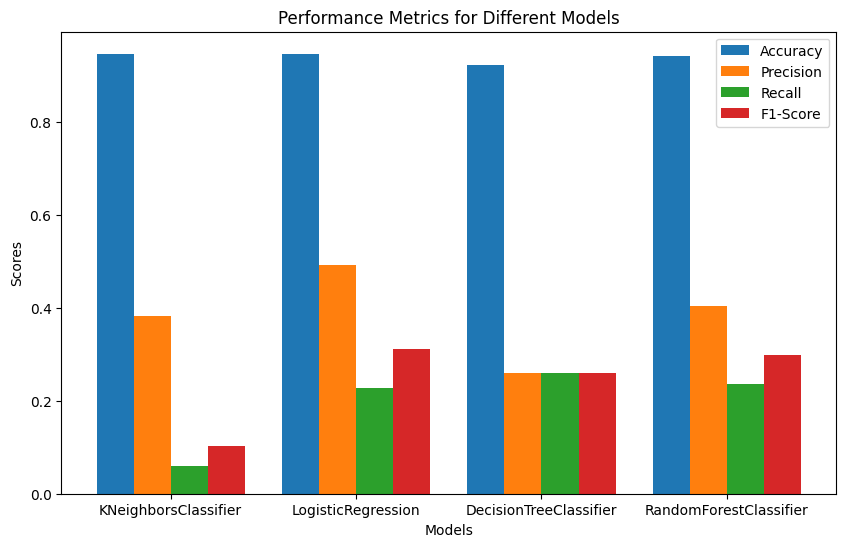

In [137]:
# Replace the following dictionary with your actual scores for multiple models
all_models_scores = {
    'KNeighborsClassifier': {'Accuracy': 0.9448610857061561, 'Precision': 0.3832923832923833, 'Recall': 0.059587471352177235, 'F1-Score': 0.1031404958677686},
    'LogisticRegression': {'Accuracy': 0.9463650590411153, 'Precision': 0.4913151364764268, 'Recall': 0.226890756302521, 'F1-Score': 0.31042592108701333},
    'DecisionTreeClassifier': {'Accuracy': 0.921143019734569, 'Precision': 0.2593440122044241, 'Recall': 0.2597402597402597, 'F1-Score': 0.2595419847328244},
    'RandomForestClassifier': {'Accuracy': 0.9407149970530252, 'Precision': 0.40273259596616784, 'Recall': 0.23644003055767762, 'F1-Score': 0.2979542719614922}
}

models = list(all_models_scores.keys())
metrics = list(all_models_scores[models[0]].keys())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    values = [all_models_scores[model][metric] for model in models]
    ax.bar(index + i * bar_width, values, bar_width, label=metric)

# Customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(index + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()

 I will focus on the
 - DesicionTree
 - RandomForest
 - Logistic Regression

 and then, 
- Consider tuning hyperparameters and using techniques like cross-validation for a more comprehensive evaluation.

### Model Training and Evaluation

#### Desicion Tree

##### Fitting and Evaluating the Model

In [138]:
# Build the Decision Tree model
#model = DecisionTreeClassifier(criterion='entropy')
Dt = DecisionTreeClassifier()

Dt.fit(X_train, y_train)
""" 
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see tree_mathematical_formulation.
"""

' \ncriterion : {"gini", "entropy", "log_loss"}, default="gini"\n    The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "log_loss" and "entropy" both for the\n    Shannon information gain, see tree_mathematical_formulation.\n'

The model is now trained! We can make predictions on the test dataset, which we can use later to score the model

In [139]:
# Make predictions on the test set
predictions = Dt.predict(X_test)

In [140]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [141]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9469747779606934

Confusion Matrix:
[[46033   527]
 [ 2082   561]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46560
           1       0.52      0.21      0.30      2643

    accuracy                           0.95     49203
   macro avg       0.74      0.60      0.64     49203
weighted avg       0.93      0.95      0.94     49203



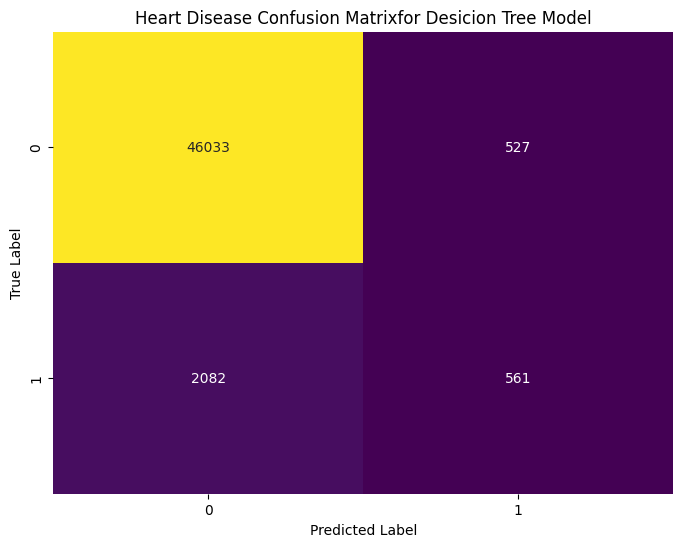

In [142]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Heart Disease Confusion Matrixfor Desicion Tree Model')
plt.show()

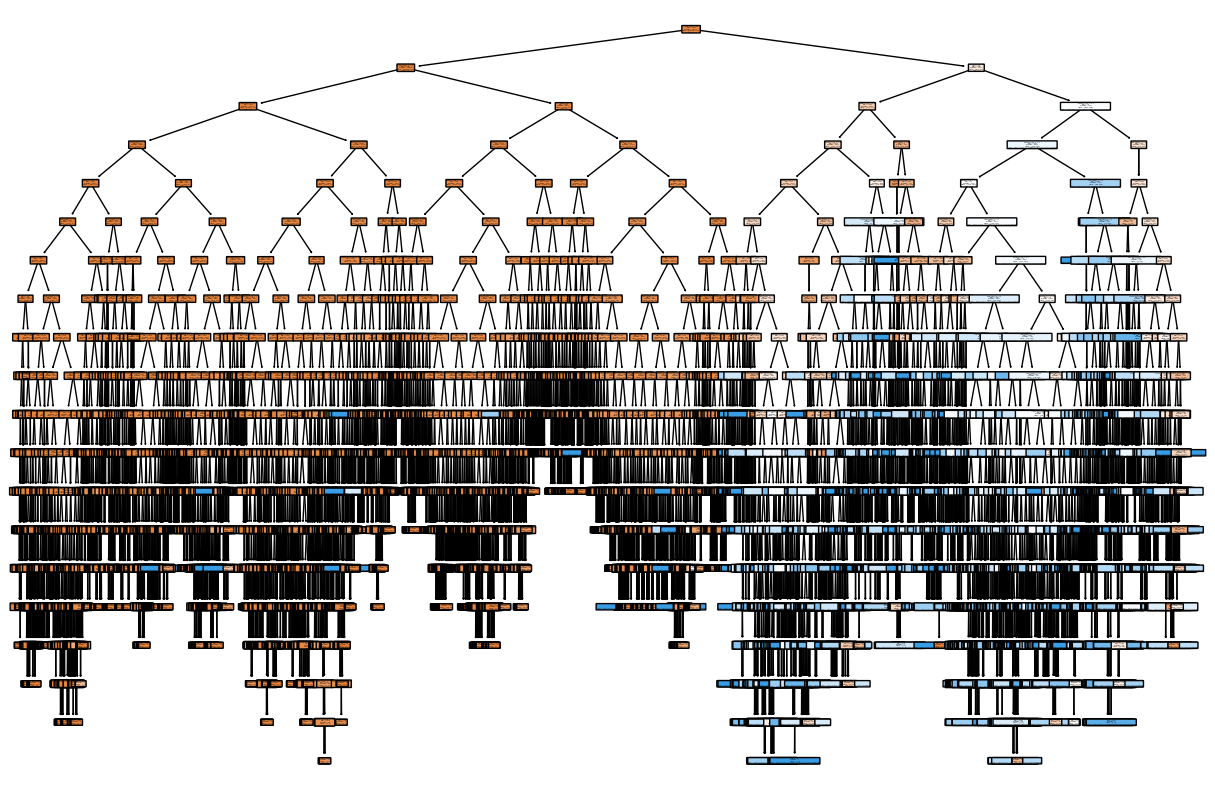

In [ ]:

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(Dt, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()


#### Random Forest

In [ ]:
# Build the Decision Tree model
#model = DecisionTreeClassifier(criterion='entropy')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9433977602991688
Precision: 0.49010791366906475
Recall: 0.19724936663047413
F1-Score: 0.2812903225806451
Confusion Matrix:
[[45873   567]
 [ 2218   545]]


In [ ]:
# Visualize the Decision Tree
from sklearn.tree import export_text

# Access the first tree in the forest
first_tree = rf_model.estimators_[0]

# Export the first tree to a text format
tree_text = export_text(first_tree, feature_names=list(X.columns))

# Print or display the text representation of the tree
print(tree_text)

|--- PneumoVaxEver <= 0.19
|   |--- HadArthritis <= 0.33
|   |   |--- HadAngina <= 1.84
|   |   |   |--- TetanusLast10Tdap <= -0.65
|   |   |   |   |--- AgeCategory <= 0.80
|   |   |   |   |   |--- AgeCategory <= -0.06
|   |   |   |   |   |   |--- Sex <= 0.04
|   |   |   |   |   |   |   |--- FluVaxLast12 <= -0.07
|   |   |   |   |   |   |   |   |--- AgeCategory <= -0.35
|   |   |   |   |   |   |   |   |   |--- AgeCategory <= -0.93
|   |   |   |   |   |   |   |   |   |   |--- GeneralHealth <= -1.21
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- GeneralHealth >  -1.21
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- AgeCategory >  -0.93
|   |   |   |   |   |   |   |   |   |   |--- AgeCategory <= -0.64
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- AgeCategory >  -0.64
|   |   |   |   |   |

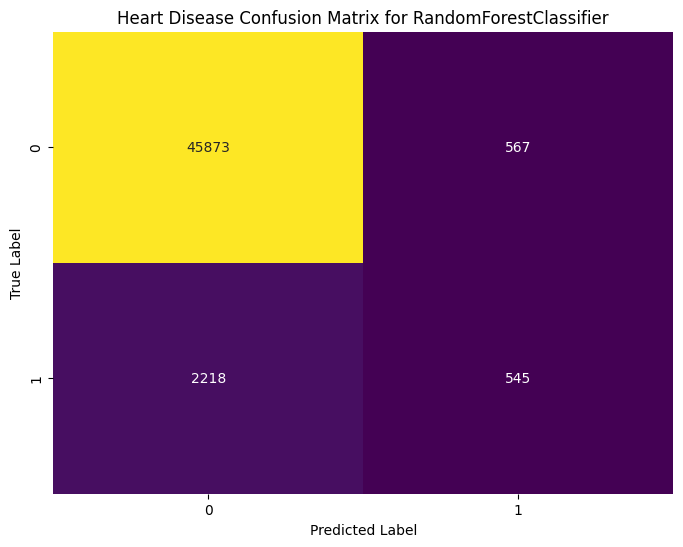

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Heart Disease Confusion Matrix for RandomForestClassifier')
plt.show()

#### Logistic Regression

##### Normalization

In [ ]:
#from sklearn.preprocessing import StandardScaler
# Scale the features using StandardScaler
scaler = StandardScaler() #Normalization 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'Train Set: {X_train.shape, y_train.shape}')
print(f'Test Set:{ X_test.shape,y_test.shape}')

Train Set: ((196810, 8), (196810,))
Test Set:((49203, 8), (49203,))


##### Fitting and Evaluating the Model



In [ ]:
#from sklearn import linear_model
logr = linear_model.LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
logr.fit(X,y)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
# Making predictions on the test set
y_pred = logr.predict(X_test)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Displaying the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9371583033554864
Precision: 0.44536698771172367
Recall: 0.48534201954397393
F1-Score: 0.4644960166262556
Confusion Matrix:
 [[44770  1670]
 [ 1422  1341]]


**Plot**

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


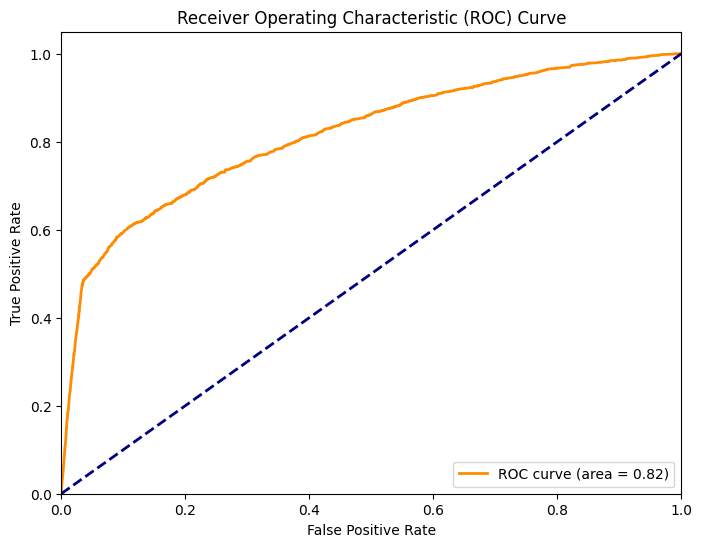

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, logr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

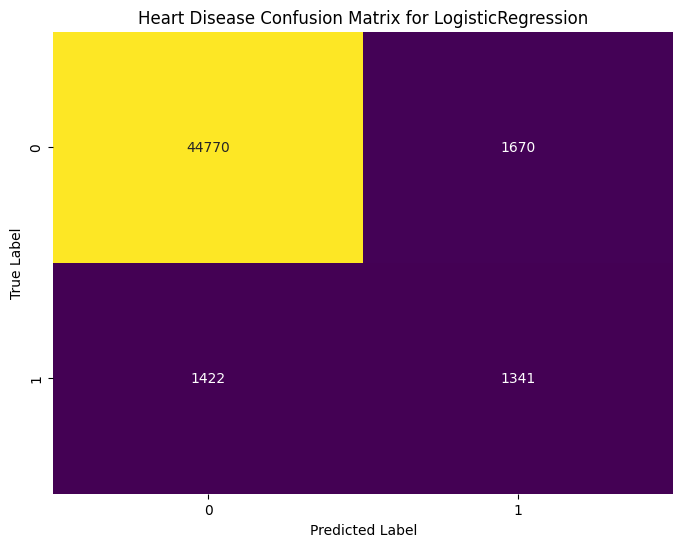

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Heart Disease Confusion Matrix for LogisticRegression')
plt.show()